# Libraries and File

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz 
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import folium
from folium.plugins import FastMarkerCluster
%matplotlib inline
import sklearn.metrics as metrics

In [2]:
from sklearn import neighbors
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import plot_importance
from sklearn import linear_model

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn import tree
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

In [4]:
import xgboost as xgb
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import learning_curve, ShuffleSplit, RepeatedKFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
import time
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor

In [ ]:
df_boston_listing = pd.read_csv("listings.csv")
df_boston_listing.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20210420194355,2021-04-21,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,41%,f,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5.0,5.0,"['email', 'phone', 'reviews']",t,f,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.02991,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,0.0,"[""Washer"", ""Dishwasher"", ""Refrigerator"", ""Pati...",$125.00,32,1125,32.0,32.0,1125.0,1125.0,32.0,1125.0,NaN,t,1,1,1,106,2021-04-21,19,3,0,2015-07-10,2021-02-26,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.27
1,6695,https://www.airbnb.com/rooms/6695,20210420194355,2021-04-21,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",NaN,NaN,NaN,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,4.0,4.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Boston, Massachusetts, United States",Roxbury,NaN,42.32802,-71.09387,Entire condominium,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Washer"", ""Dishwasher"", ""Fire extinguisher"", ...",$169.00,29,730,29.0,29.0,730.0,730.0,29.0,730.0,NaN,t,8,19,40,40,2021-04-21,115,0,0,2009-08-06,2019-11-02,96.0,10.0,10.0,10.0,10.0,9.0,10.0,STR-404620,f,4,4,0,0,0.81
2,10813,https://www.airbnb.com/rooms/10813,20210420194355,2021-04-23,"Back Bay Apt-blocks to subway, Newbury St, The...",Stunning Back Bay furnished studio apartment. ...,Wander around this quintessential neighborhood...,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,US,NaN,within a few hours,97%,17%,f,https://a0.muscache.com/im/pictures/user/13444...,https://a0.muscache.com/im/pictures/user/13444...,Back Bay,15.0,15.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Boston, Massachusetts, United States",Back Bay,NaN,42.35061,-71.08787,Entire apartment,Entire home/apt,3,NaN,1 bath,NaN,1.0,"[""Wifi"", ""Kitchen"", ""Dishwasher"", ""Refrigerato...",$96.00,29,1125,29.0,29.0,1125.0,1125.0,29.0,1125.0,NaN,t,29,59,63,307,2021-04-23,5,1,0,2016-05-23,2020-12-02,99.0,10.0,10.0,10.0,10.0,10.0,

# Data Exploration , Visualization and Processing

In [ ]:
df_boston_listing.shape

(3146, 74)

In [ ]:
df_boston_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3146 non-null   int64  
 1   listing_url                                   3146 non-null   object 
 2   scrape_id                                     3146 non-null   int64  
 3   last_scraped                                  3146 non-null   object 
 4   name                                          3146 non-null   object 
 5   description                                   3111 non-null   object 
 6   neighborhood_overview                         2132 non-null   object 
 7   picture_url                                   3146 non-null   object 
 8   host_id                                       3146 non-null   int64  
 9   host_url                                      3146 non-null   o

In [ ]:
df_boston_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.146000e+03,3.146000e+03,3.146000e+03,3068.000000,3068.000000,0.0,3146.000000,3146.000000,3146.000000,0.0,2733.000000,3046.000000,3146.000000,3146.000000,3144.000000,3144.000000,3.144000e+03,3.144000e+03,3144.000000,3.144000e+03,0.0,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,2149.000000,2147.000000,2148.000000,2146.000000,2149.000000,2147.000000,2147.000000,3146.000000,3146.000000,3146.000000,3146.000000,2164.000000
mean,2.988069e+07,2.021042e+13,1.180036e+08,189.031617,189.031617,NaN,42.337572,-71.080984,3.075652,NaN,1.446762,1.661852,42.440877,771.911952,43.562341,71.043893,1.366970e+06,2.050016e+06,69.682188,2.048469e+06,NaN,12.091227,27.386523,44.261920,178.293388,36.025429,4.036554,0.423077,93.443462,9.588263,9.471601,9.754427,9.677524,9.600373,9.279460,24.818182,20.658932,4.098220,0.005086,1.424653
std,1.537945e+07,8.751391e-01,1.240861e+08,472.384742,472.384742,NaN,0.026509,0.032690,2.119483,NaN,0.855501,1.311276,45.084840,477.025330,60.641826,143.534784,5.415447e+07,6.631485e+07,139.631365,6.626488e+07,NaN,12.316040,24.566033,36.644288,139.056764,71.069285,12.527398,1.307419,8.911587,0.875264,0.927575,0.744704,0.861315,0.751240,0.967873,41.719009,40.873075,9.678302,0.071145,1.768545
min,3.781000e+03,2.021042e+13,4.804000e+03,0.000000,0.000000,NaN,42.235330,-71.173510,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,3.000000e+00,1.000000,3.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.715611e+07,2.021042e+13,1.628474e+07,1.000000,1.000000,NaN,42.322415,-71.097945,2.000000,NaN,1.000000,1.000000,2.000000,365.000000,2.000000,3.000000,3.650000e+02,3.657500e+02,2.900000,3.650000e+02,NaN,0.000000,0.000000,1.000000,39.250000,0.000000,0.000000,0.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.237500
50%,3.251965e+07,2.021042e+13,5.680370e+07,5.000000,5.000000,NaN,42.344290,-71.070535,2.000000,NaN,1.000000,1.000000,29.000000,1125.000000,29.000000,29.000000,1.125000e+03,1.125000e+03,29.000000,1.125000e+03,NaN,8.000000,24.000000,47.500000,171.000000,5.000000,0.000000,0.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,5.000000,1.000000,0.000000,0.000000,0.830000
75%,4.509599e+07,2.021042e+13,2.123598e+08,30.000000,30.000000,NaN,42.354335,-71.061143,4.000000,NaN,2.000000,2.000000,91.000000,1125.000000,91.000000,91.000000,1.125000e+03,1.125000e+03,91.000000,1.125000e+03,NaN,25.000000,55.000000,85.000000,325.000000,37.000000,2.000000,0.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,25.000000,16.000000,3.000000,0.000000,2.062500
max,4.930686e+07,2.021042e+13,3.938483e+08,2232.000000,2232.000000,NaN,42.399730,-70.982640,16.000000,NaN,13.000000,22.000000,1000.000000,9999.000000,1000.000000,1000.000000,2.147484e+09,2.147484e+09,1000.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,610.000000,375.000000,24.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,152.00

In [ ]:
df_boston_listing.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
name                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               982
Length: 74, dtype: int64

In [ ]:
#sns.pairplot(df_boston_listing, kind='scatter', diag_kind='kde',corner=True, hue='price')

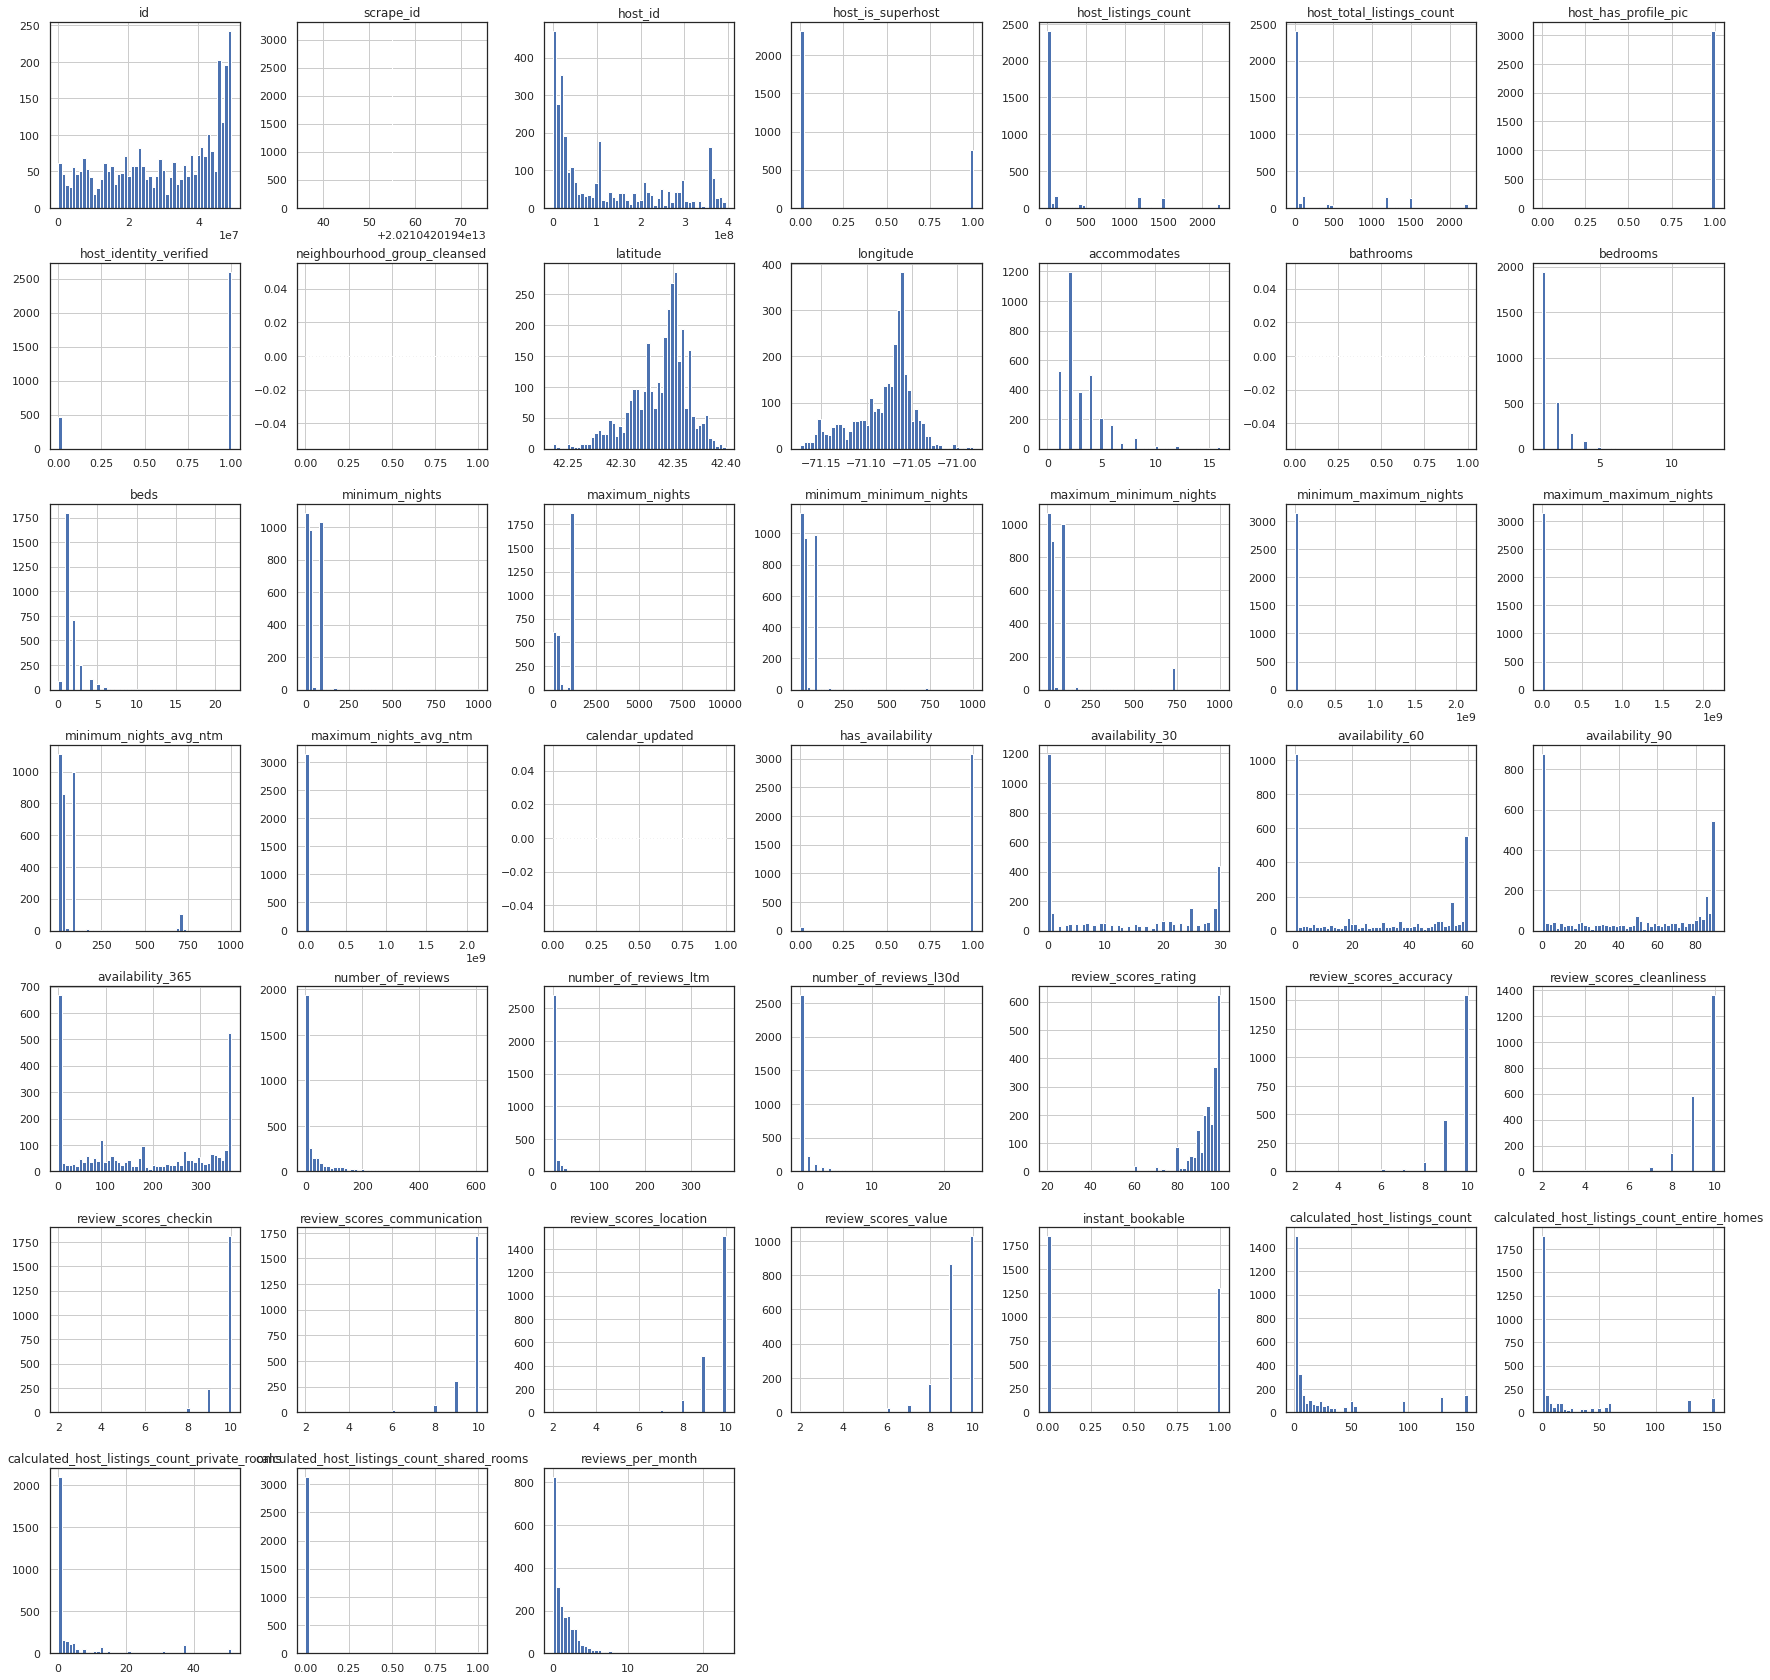

In [ ]:
# Replacing columns with f/t with 0/1
df_boston_listing.replace({'f': 0, 't': 1},inplace = True)

# Checking Distribution of values 
df_boston_listing.hist(bins=50, figsize=(30,30))
plt.savefig('distribution.png', dpi=600, bbox_inches='tight')
plt.show()

Checking whether boolean and categorical features contain sufficient numbers of instances in each category to make them worth including.It can be seen that several columns only contain one category and can be dropped while preprocessing.

# Data Preprocessing

In [ ]:
df_boston_listing.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20210420194355,2021-04-21,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,41%,0.0,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5.0,5.0,"['email', 'phone', 'reviews']",1.0,0.0,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.02991,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,0.0,"[""Washer"", ""Dishwasher"", ""Refrigerator"", ""Pati...",$125.00,32,1125,32.0,32.0,1125.0,1125.0,32.0,1125.0,NaN,1,1,1,1,106,2021-04-21,19,3,0,2015-07-10,2021-02-26,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,0,1,1,0,0,0.27
1,6695,https://www.airbnb.com/rooms/6695,20210420194355,2021-04-21,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",NaN,NaN,NaN,1.0,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,4.0,4.0,"['email', 'phone', 'reviews', 'kba']",1.0,1.0,"Boston, Massachusetts, United States",Roxbury,NaN,42.32802,-71.09387,Entire condominium,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Washer"", ""Dishwasher"", ""Fire extinguisher"", ...",$169.00,29,730,29.0,29.0,730.0,730.0,29.0,730.0,NaN,1,8,19,40,40,2021-04-21,115,0,0,2009-08-06,2019-11-02,96.0,10.0,10.0,10.0,10.0,9.0,10.0,STR-404620,0,4,4,0,0,0.81
2,10813,https://www.airbnb.com/rooms/10813,20210420194355,2021-04-23,"Back Bay Apt-blocks to subway, Newbury St, The...",Stunning Back Bay furnished studio apartment. ...,Wander around this quintessential neighborhood...,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,US,NaN,within a few hours,97%,17%,0.0,https://a0.muscache.com/im/pictures/user/13444...,https://a0.muscache.com/im/pictures/user/13444...,Back Bay,15.0,15.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1.0,1.0,"Boston, Massachusetts, United States",Back Bay,NaN,42.35061,-71.08787,Entire apartment,Entire home/apt,3,NaN,1 bath,NaN,1.0,"[""Wifi"", ""Kitchen"", ""Dishwasher"", ""Refrigerato...",$96.00,29,1125,29.0,29.0,1125.0,1125.0,29.0,1125.0,NaN,1,29,59,63,307,2021-04-23,5,1,0,2016-05-23,2020-12-02,99.0,10.0,10

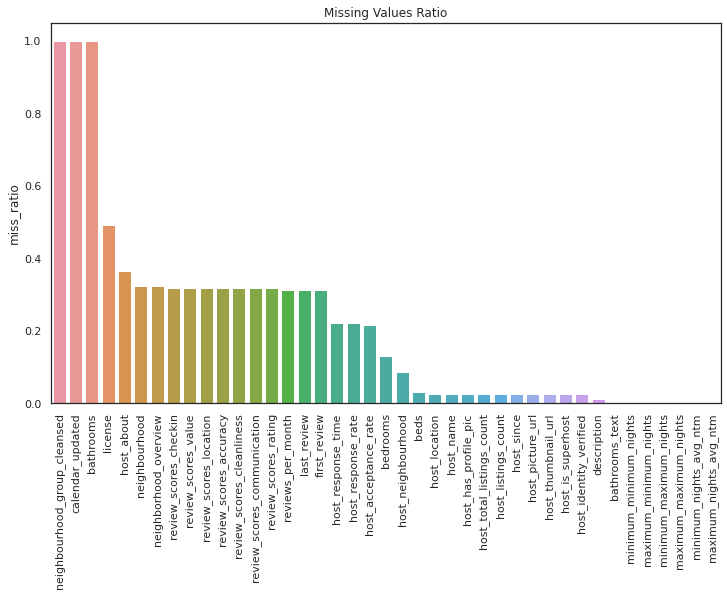

In [ ]:
# check the missness ratio
plt.figure(figsize= (12,7))
plt.xticks(rotation='90')
plt.title('Missing Values Ratio')
# we combine the train dataset and test dataset together to hadling missness
# attri = pd.concat([h_price.iloc[:,1:80], h_price_test.iloc[:,1:]], axis= 0, join = 'outer', ignore_index=True)
col_na = df_boston_listing.loc[:,df_boston_listing.isna().any()]
mis_ratio = pd.DataFrame((col_na.isna().sum()/col_na.shape[0]).sort_values(ascending = False),
                        columns = ['miss_ratio'])
sns.barplot(mis_ratio.index, mis_ratio.miss_ratio)
plt.savefig('missness_ratio.png', dpi=300, bbox_inches='tight')

In [ ]:
# Getting columns with more than 75% missing values
df_boston_listing.columns[df_boston_listing.isnull().mean() > 0.75]

Index(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'], dtype='object')

These are text columns with description which will not be useful for prediction. Also few columns like 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated' have more than 75% missing values.

In [ ]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description','neighborhood_overview','picture_url','host_id', 
                'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                'host_neighbourhood', 'host_verifications','neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated','license']

df_boston_listing_preprocessed = df_boston_listing.drop(cols_to_drop,axis=1)      

In [ ]:
# Setting 'id' as index

df_boston_listing_preprocessed = df_boston_listing_preprocessed.set_index('id')

In [ ]:
# host_listings_count and host_total_listings_count have similar values. 3068 rows have similar values and 78 rows have NaN values. Hence, We can drop one of these column.

print(sum((df_boston_listing_preprocessed['host_listings_count']== df_boston_listing_preprocessed['host_total_listings_count']) == True))

# Dropping 'host_total_listings_count' column
df_boston_listing_preprocessed = df_boston_listing_preprocessed.drop(['host_total_listings_count'], axis=1)

3068


In [ ]:
# Dropping 'neighbourhood' column which contains city name. As, we are only focused on ' Boston' , this column is not useful.

df_boston_listing_preprocessed = df_boston_listing_preprocessed.drop(['neighbourhood','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'], axis=1)

In [ ]:
# The minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm columns are removed because there are few differences between them. 
# The two main columns minimum_nights and maximum_nights will be used instead of them.

df_boston_listing_preprocessed = df_boston_listing_preprocessed.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1)

In [ ]:
"""
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20))

"""

"\n# Replacing columns with f/t with 0/1\ndf.replace({'f': 0, 't': 1}, inplace=True)\n\n# Plotting the distribution of numerical and boolean categories\ndf.hist(figsize=(20,20))\n\n"

**Handling missing values in individual columns**

Host_since

In [ ]:
df_boston_listing_preprocessed.host_since

id
3781        2008-12-03
6695        2009-02-19
10813       2009-09-16
10986       2009-09-16
13247       2009-11-05
               ...    
49271154    2016-07-31
49283610    2020-09-23
49291430    2020-07-29
49294229    2020-07-29
49306861    2014-09-02
Name: host_since, Length: 3146, dtype: object

As this is a date time column , we are converting the column to a measure of no of days that a host been on the platform, measured from the date the data was scraped.

In [ ]:
df_boston_listing_preprocessed.host_since = pd.to_datetime(df_boston_listing_preprocessed.host_since) 

df_boston_listing_preprocessed['host_days_active'] = (datetime(2021, 4, 23) - df_boston_listing_preprocessed.host_since).astype('timedelta64[D]')

print("Mean days as host:", round(df_boston_listing_preprocessed['host_days_active'].mean(),0))
print("Median days as host:", df_boston_listing_preprocessed['host_days_active'].median())

#df_boston_listing_preprocessed.host_days_active.plot(kind='bar',figsize=(10,6))

df_boston_listing_preprocessed.host_days_active.fillna(df_boston_listing_preprocessed.host_days_active.median(), inplace=True)

Mean days as host: 1829.0
Median days as host: 1895.0


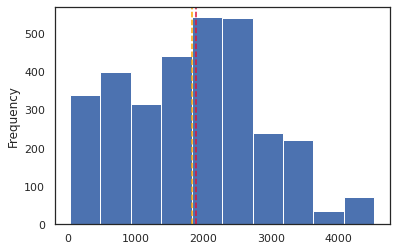

In [ ]:
df_boston_listing_preprocessed['host_days_active'].plot(kind='hist')
plt.axvline(df_boston_listing_preprocessed['host_days_active'].mean(), color='orange', linestyle='--') 
plt.axvline(df_boston_listing_preprocessed['host_days_active'].median(), color='crimson', linestyle='--')  

Host_response_time

This column contains 694 NA values. Replacing these NA values with 'unknown'

In [ ]:
print("Null values:", df_boston_listing_preprocessed.host_response_time.isna().sum())
print(f"Proportion: {round((df_boston_listing_preprocessed.host_response_time.isna().sum()/len(df_boston_listing_preprocessed))*100, 1)}%")

Null values: 694
Proportion: 22.1%


In [ ]:
df_boston_listing_preprocessed.host_response_time.fillna("unknown", inplace=True)
df_boston_listing_preprocessed.host_response_time.value_counts(normalize=True)

within an hour        0.553401
unknown               0.220598
within a few hours    0.130960
within a day          0.076287
a few days or more    0.018754
Name: host_response_time, dtype: float64

Host_response_rate

Similar to host_response_time, Missing values are replaced with 'unknown'.


In [ ]:
df_boston_listing_preprocessed.host_response_rate[:-1]

# Removing the % sign from the host_response_rate string  
df_boston_listing_preprocessed.host_response_rate = df_boston_listing_preprocessed.host_response_rate.str[:-1].astype('float64')

In [ ]:
# Bin into four categories
df_boston_listing_preprocessed.host_response_rate = pd.cut(df_boston_listing_preprocessed.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df_boston_listing_preprocessed.host_response_rate = df_boston_listing_preprocessed.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df_boston_listing_preprocessed.host_response_rate= df_boston_listing_preprocessed.host_response_rate.replace('nan', 'Not Known')

# Category counts
df_boston_listing_preprocessed.host_response_rate.value_counts()

100%         1515
Not Known     694
90-99%        627
50-89%        224
0-49%          86
Name: host_response_rate, dtype: int64

host_is_superhost

Checking for rows , having missing values in multiple columns. 

In [ ]:
# Checking for rows , having missing values in multiple columns. 

list_col = ['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic','host_identity_verified']

len(df_boston_listing_preprocessed[df_boston_listing_preprocessed.loc[ :,[i for i in list_col ]].isnull().sum(axis=1) == 5])

df_boston_listing_preprocessed.dropna(subset=['host_since'], inplace=True)

Property Type

In [ ]:
# There are various categories in Property Type Column. So , Dividing them into 'House','Apartment' and 'Other'.

df_boston_listing_preprocessed.property_type.replace({
    'Entire apartment' : 'Apartment',
    'Private room in apartment' : 'Apartment',
    'Entire serviced apartment' : 'Apartment',
    'Shared room in apartment' : 'Apartment',
    'Entire home/apt' : 'Apartment',
    'Private room in house': 'House',
    'Entire condominium': 'House',
    'Entire house': 'House',
    'Private room in condominium': 'House',
    'Entire townhouse': 'House',
    'Private room in townhouse': 'House',
    'Entire guesthouse': 'House',
    'Private room in bungalow': 'House',
    'Shared room in house': 'House',
    'Private room in villa': 'House',
    'Shared room in townhouse': 'House',
    'Shared room in condominium': 'House'
    }, inplace=True)

df_boston_listing_preprocessed.loc[~df_boston_listing_preprocessed.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

df_boston_listing_preprocessed.property_type.value_counts()

Apartment    1956
House         882
Other         230
Name: property_type, dtype: int64

Bathrooms,Bedrooms,Beds

In [ ]:

df_boston_listing_preprocessed = df_boston_listing_preprocessed.rename(columns={"bathrooms_text":"bathrooms"})

#df_boston_listing_preprocessed.bathrooms.replace({
#"1 private bath" : "1 bath"},inplace=True)

In [ ]:
# Missing values will be replaced with the median.

df_boston_listing_preprocessed = df_boston_listing_preprocessed.rename(columns={"bathrooms_text":"bathrooms"})


df_boston_listing_preprocessed.bathrooms.replace({
"1 bath" : 1,
"1 shared bath" : 1,        
"2 baths"  : 2,              
"2 shared baths": 2,
"1 private bath": 1,                
"1.5 baths" : 1.5,          
"1.5 shared baths": 1.5,      
"2.5 baths"  : 2.5,          
"3 baths"  : 3,       
"2.5 shared baths": 2.5,       
"3 shared baths" : 3,       
"3.5 baths"  : 3.5,       
"0 shared baths" : 0,       
"6 shared baths" : 6,       
"4.5 baths"   : 4.5,          
"3.5 shared baths" : 3.5,     
"Shared half-bath" : 0.5,     
"4 shared baths" : 4,       
"Half-bath"  : 0.5,          
"5 baths"  : 5,          
"4 baths"  : 4,            
"Private half-bath": 0.5,      
"0 baths" : 0,          
"6 baths" : 6              
}, inplace=True)



In [ ]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df_boston_listing_preprocessed[col].fillna(df_boston_listing_preprocessed[col].median(), inplace=True)
    
df_boston_listing_preprocessed.bathrooms.value_counts()

1.0    2269
2.0     479
1.5     189
2.5      60
3.0      40
3.5      12
0.0       7
6.0       4
0.5       3
4.5       2
4.0       2
5.0       1
Name: bathrooms, dtype: int64

Price

In [ ]:
# Converting Price column values into integer

df_boston_listing_preprocessed.price = df_boston_listing_preprocessed.price.str.replace('$', '', regex=True).replace(',', '', regex=True).astype(float)

df_boston_listing_preprocessed.price.value_counts()

# Replacing values less than $40 with $40
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed.price <= 40, 'price'] = 40

# Replacing values over $1000 with $1000
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed.price >= 1000, 'price'] = 1000

First Review and Last Review


About a quarter of listings have not had a review written for them. This is too large a proportion of the dataset to drop, and dropping the columns would lose a lot of useful information - reviews are very important in people's decisions to book, and therefore price.

This is also too large a proportion of the dataset to simply replace with median/mean values, as this would skew the distribution substantially. Also, the missing values here are not really missing values, as the fact that they are NaNs is meaningful - it tells us that these are new or previously unbooked listings that have not had reviews yet. In order to make the resulting model work able to predict prices for any Airbnb listing, including brand new listings, is is actually beneficial to keep them in. Therefore, these will be kept as an 'unknown' category, and the feature will have to be treated as categorical (and therefore one-hot encoded) rather than numerical.

In [ ]:
print(f"Null values in 'first_review': {round(100*df_boston_listing_preprocessed.first_review.isna().sum()/len(df_boston_listing_preprocessed),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df_boston_listing_preprocessed.review_scores_rating .isna().sum()/len(df_boston_listing_preprocessed),1)}%")

Null values in 'first_review': 31.0%
Null values in 'review_scores_rating': 31.5%


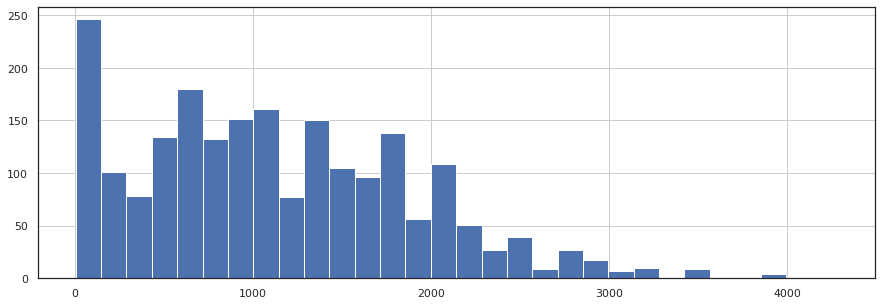

In [ ]:
df_boston_listing_preprocessed.first_review = pd.to_datetime(df_boston_listing_preprocessed.first_review) # Converting to datetime

#Calculating the number of days between the first review and the date the data was scraped
df_boston_listing_preprocessed['time_since_first_review'] = (datetime(2021, 4, 23) - df_boston_listing_preprocessed.first_review).astype('timedelta64[D]')

# Distribution of the number of days since first review
df_boston_listing_preprocessed.time_since_first_review.hist(figsize=(15,5), bins=30);

In [ ]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df_boston_listing_preprocessed[col] = pd.cut(df_boston_listing_preprocessed[col], bins=bins, labels=labels, include_lowest=True)
    df_boston_listing_preprocessed[col] = df_boston_listing_preprocessed[col].astype('str')
    df_boston_listing_preprocessed[col].fillna(na_label, inplace=True)

In [ ]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df_boston_listing_preprocessed.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

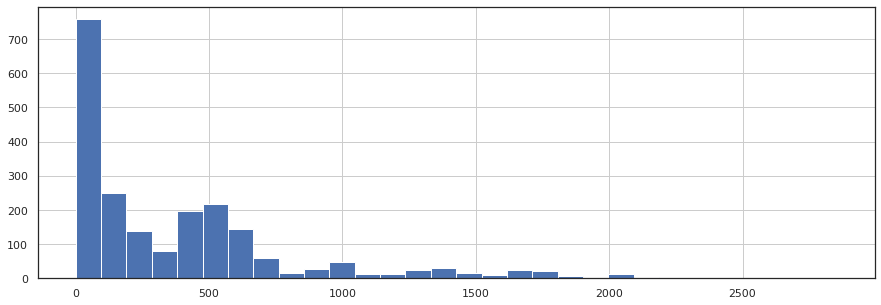

In [ ]:
df_boston_listing_preprocessed.last_review = pd.to_datetime(df_boston_listing_preprocessed.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df_boston_listing_preprocessed['time_since_last_review'] = (datetime(2021, 4, 23) - df_boston_listing_preprocessed.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
df_boston_listing_preprocessed.time_since_last_review.hist(figsize=(15,5), bins=30);

In [ ]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df_boston_listing_preprocessed.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [ ]:
# Dropping last_review
df_boston_listing_preprocessed.drop('last_review', axis=1, inplace=True)

review ratings columns


As above, listings without reviews will be kept and replaced with 'unknown'. Other ratings will be grouped into bins. The histograms below were produced in order to decide on useful bins. The majority of ratings are 9 or 10 out of 10, as also seen in the value count below. Therefore for these columns, 9/10 and 10/10 will be kept as separate groups, and 1-8/10 will be binned together (as this is, by Airbnb standards, a 'low' rating).

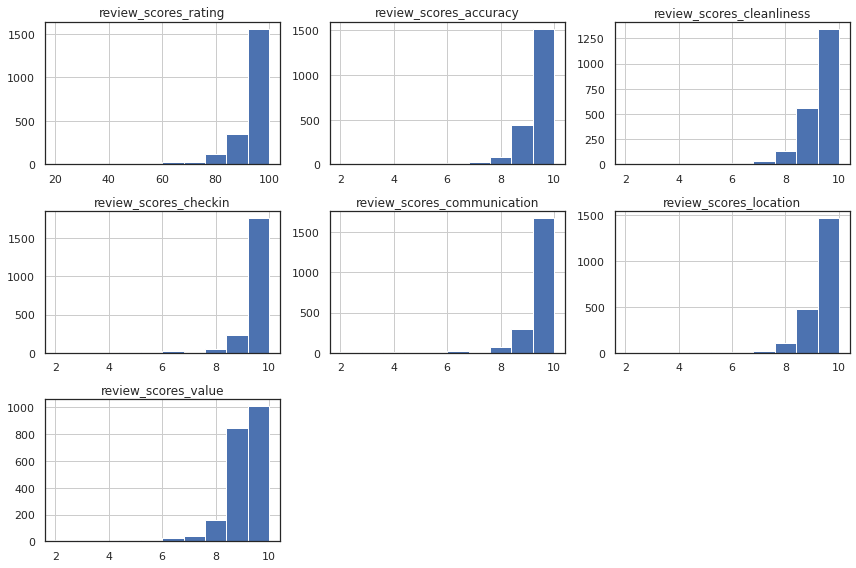

In [ ]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df_boston_listing_preprocessed.columns[df_boston_listing_preprocessed.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df_boston_listing_preprocessed[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [ ]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)

'review_scores_rating'

In [ ]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [ ]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

Amenities

In [ ]:
df_boston_listing_preprocessed.amenities[:1].values

array(['["Washer", "Dishwasher", "Refrigerator", "Patio or balcony", "Iron", "Heating", "Carbon monoxide alarm", "Wifi", "Free parking on premises", "Extra pillows and blankets", "Microwave", "Shampoo", "Air conditioning", "Hot water", "Cable TV", "Long term stays allowed", "Hair dryer", "Essentials", "Free street parking", "Coffee maker", "Stove", "Oven", "Hangers", "Cooking basics", "Dryer", "Dedicated workspace", "Bed linens", "TV with standard cable", "Kitchen", "Dishes and silverware", "Smoke alarm"]'],
      dtype=object)

In [ ]:
# Creating a set of all possible amenities
amenities_list = list(df_boston_listing_preprocessed.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '1 space',
 '2-5 years old',
 '24-hour fitness center',
 '32\\ HDTV with Netflix',
 '32\\ HDTV with standard cable',
 '37\\ HDTV with Amazon Prime Video',
 '40\\ HDTV with Roku',
 '40\\ HDTV with standard cable',
 '40\\ TV',
 '42\\ HDTV',
 '42\\ HDTV with Amazon Prime Video',
 '42\\ HDTV with Roku',
 '45\\ HDTV with premium cable',
 '48\\ HDTV',
 '5-10 years old',
 '50\\ HDTV with Roku',
 '50\\ HDTV with standard cable',
 '52\\ HDTV',
 '54\\ HDTV with Netflix',
 '55\\ HDTV',
 '55\\ HDTV with Apple TV',
 '55\\ HDTV with Netflix',
 '6 spaces',
 '65\\ HDTV with Amazon Prime Video',
 '65\\ HDTV with Netflix',
 '75\\ TV',
 'Air conditioning',
 'Alaffia',
 'Amazon Prime Video',
 'Apple TV',
 'Avanti stainless steel electric stove',
 'Avanti stainless steel oven',
 'Aveeno body soap',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Baby safety gates',
 'Babysitter recommendations',
 'Backyard',
 'Baking sheet',
 'Barbecue utensils',
 'Bath & Body Works  body soap',
 'Bath & Body Works bo

In [ ]:
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Air conditioning|Central air conditioning|Portable air conditioning'), 'air_conditioning'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Exercise equipment|Gym|gym|24-hour fitness center|Gym|Private gym in building|Shared gym in building|Gym/Private gym in building'), 'gym'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV|32\\ HDTV with Netflix|32\\ HDTV with standard cable|37\\ HDTV with Amazon Prime Video|40\\ HDTV with Roku|40\\ HDTV with standard cable|40\\ TV|42\\ HDTV|42\\ HDTV with Amazon Prime Video|42\\ HDTV with Roku|45\\ HDTV with premium cable|48\\ HDTV|50\\ HDTV with Roku|50\\ HDTV with standard cable|52\\ HDTV|54\\ HDTV with Netflix|55\\ HDTV|55\\ HDTV with Apple TV|55\\ HDTV with Netflix|65\\ HDTV with Amazon Prime Video|65\\ HDTV with Netflix|75\\ TV|Amazon Prime Video|Apple TV| Cable TV|HBO Max|HDTV|HDTV with Amazon Prime Video|HDTV with Apple TV|HDTV with HBO Max|HDTV with Netflix|HDTV with Roku|HDTV with premium cable|HDTV with standard cable| Netflix|TV|TV with Amazon Prime Video|TV with Chromecast|TV with HBO Max|TV with Netflix|TV with Roku|TV with standard cable'), 'tv'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Avanti stainless steel electric stove|Avanti stainless steel oven|Ikea oven|Kenmore oven|Bosch stainless steel oven'), 'oven'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Electric stove|Gas stove|Ikea gas stove|Kenmore electric stove|Kenmore stainless steel electric stove|Bosch stainless steel gas stove'), 'stove'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('BBQ grill|Fire pit|Barbecue utensils'), 'bbq'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('balcony|Patio or balcony|Patio'),'nature_and_views'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront|Lake access|Beachfront||Ski-in/Ski-out'), 'nature_and_views'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Bed linens|Bed sheets and pillows|linens'), 'bed_linen'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Breakfast|Complimentary continental breakfast|Continental breakfast available \\u2014 $14 per person per day'), 'breakfast'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Coffee maker|Espresso machine|Coffee maker|Keurig coffee machine|Nespresso machine|Pour-over coffee'), 'coffee_machine'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Dryer|Dryer \\u2013 In building|Dryer \\u2013\\u00a0In unit|Drying rack for clothing|Dishwasher|Free washer\\u2013In building|Free washer\\u2013In unit|Paid washer\\u2013In building|WasherWasher \\u2013\\u00a0In building|Washer \\u2013\\u00a0In unit'), 'white_goods'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Elevator'), 'elevator'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Children\\u2019s books and toys|Children\\u2019s books and toys for ages 0-2 years old|Children\\u2019s books and toys for ages 0-2 years old and 2-5 years old|Children\\u2019s dinnerware|Baby bath|Baby monitor|Baby safety gates|Babysitter recommendations'), 'child_friendly'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Free driveway parking on premises|Free driveway parking on premises \\u2013 1 space|Free driveway parking on premises \\u2013 2 spaces| Free parking garage on premises|Free parking on premises|Free street parking|Paid parking garage off premises|Paid parking garage off premises \\u2013 $30 per day|Paid parking garage off premises \\u2013 $32 per day|Paid parking garage off premises \\u2013 $35 per day|Paid parking garage off premises \\u2013 $40 per day|Paid parking garage off premises \\u2013 $45 per day|Paid parking garage off premises \\u2013 $48 per day|Paid parking garage off premises \\u2013 $50 per day|Paid parking garage on premises|Paid parking garage on premises \\u2013 1 space|Paid parking lot off premises|Paid parking lot off premises \\u2013 $35 per day|Paid parking lot on premises|Paid parking lot on premises \\u2013 $50 per day|Paid parking lot on premises \\u2013 $65 per day|Paid parking lot on premises \\u2013 1 space|Paid parking lot on premises \\u2013 2 spaces|Paid parking off premises|Paid parking on premises|Paid street parking off premises'), 'parking'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Private fenced garden or backyard|Private garden or backyard|Garden|Outdoor|Sun loungers|Terrace|Backyard'), 'outdoor_space'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Private hot tub|Shared outdoor heated saltwater pool|Shared outdoor pool|Shared pool|Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Internet|Pocket wifi|Wifi|Pocket wifi|Wifi|Wifi \\u2013 100 Mbps|Wifi \\u2013 1000 Mbps|Wifi \\u2013 15 Mbps|Wifi \\u2013 150 Mbps|Wifi \\u2013 180 Mbps|Wifi \\u2013 200 Mbps|Wifi \\u2013 250 Mbps|Wifi \\u2013 363 Mbps|Wifi \\u2013 60 Mbps|Wifi \\u2013 600 Mbps|Wifi \\u2013 70 Mbps|Wifi \\u2013 90 Mbps|Free wifi'), 'internet'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)|Pets allowed'), 'pets_allowed'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Safe|Security system|Security cameras on property'), 'secure'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1 
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Aveeno body soap|Bathtub|Beekman Hotel conditioner|Beekman body soap|Beekman conditioner|Beekman shampoo|Bath & Body Works body soap|Bath & Body Works body soap|Bath & Body Works conditioner|Bath & Body Works shampoo|Bath & Body Works. body soap|Body soap//Both bar soaps and body wash are available for you. body soap|DOVE Usually body soap|Dove body soap|Dove conditioner|Dove shampoo|Eco body soap|Gilchrist And Saomes body soap|Gilchrist and Soames body soap|Gilchrist and Somes body soap|Irish Spring Shower gel|Dial liquid hand soap|Tulip body soap body soap|Maxxam conditioner|Maxxam shampoo|PANTENE Usually conditioner|PANTENE Usually shampoo|TRESemm\\u00e9 conditioner|TRESemm\\u00e9 shampoo|Loreal conditioner'), 'toiletries'] = 1 
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Sonos Bluetooth sound system|Sonos and Amazon Tap Bluetooth sound system|bose sound system with Bluetooth and aux|Bluetooth sound system|Bluetooth speaker|Bluetooth speaker Bluetooth sound system|Bose Sound Touch with Bluetooth sound system with Bluetooth and aux'), 'sound_system'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Dedicated workspace|Dedicated workspace: desk|Dedicated workspace: desk and office chair|Dedicated workspace: desk and table|Dedicated workspace: monitor and desk|Dedicated workspace: office chair and desk|Dedicated workspace: table|Dedicated workspace: table and desk|Dedicated workspace: table and office chair'), 'workspace'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Freezer|GE refrigerator| LG refrigerator|Purchased in 2020. Refrigerator|Samsung refrigerator|WHIRLPOOL refrigerator|WHRILPOOL refrigerator|Mini fridge|KitchenAid refrigerator|Kitchenaid refrigerator'), 'refrigerator'] = 1
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed['amenities'].str.contains('Onsite restaurant \\u2014 Cosmica|Onsite restaurant \\u2014 canteenM-open 24/7 Open 24/7'), 'canteen'] = 1


/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df_boston_listing_preprocessed.iloc[:,43:].columns
df_boston_listing_preprocessed[cols_to_replace_nulls] = df_boston_listing_preprocessed[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df_boston_listing_preprocessed.iloc[:,43:].columns:
    if df_boston_listing_preprocessed[col].sum() < len(df_boston_listing_preprocessed)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df_boston_listing_preprocessed.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df_boston_listing_preprocessed.drop('amenities', axis=1, inplace=True)

['oven', 'stove', 'breakfast', 'child_friendly', 'host_greeting', 'pets_allowed', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable', 'sound_system', 'canteen']


number_of_reviews_ltm and reviews_per_month

In [ ]:
# reviews_per_month and number_of_reviews are very similar and so will be dropped.

df_boston_listing_preprocessed.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

Availability

All availability(30,60,90,365) columns are highly correlated, so we can drop other columns.

In [ ]:
df_boston_listing_preprocessed.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

# Data Visualization

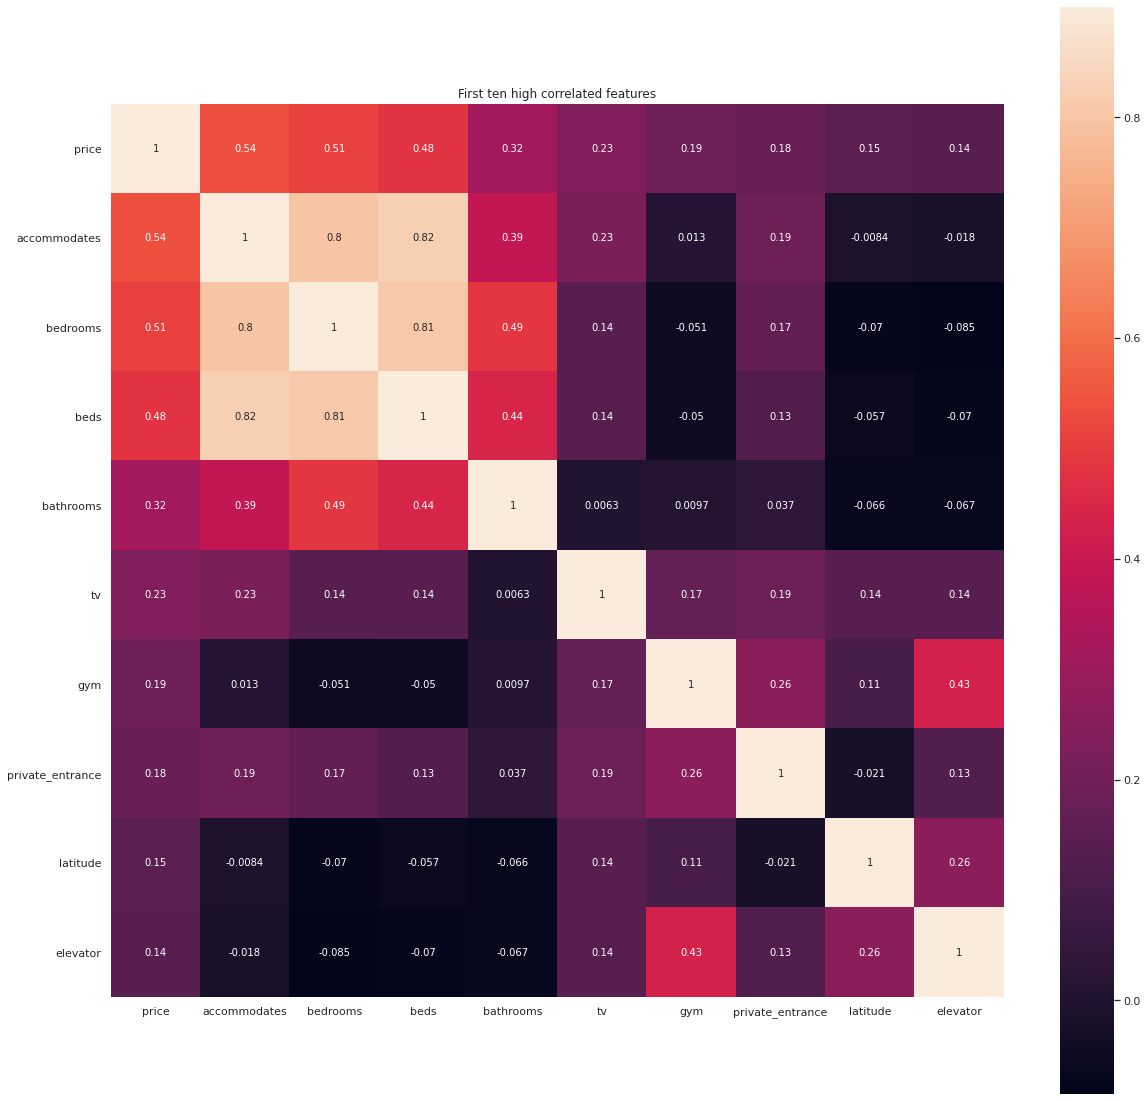

In [ ]:
#correlation check for each feature with target feature and plot the first ten high corr features
df_boston_listing_preprocessed['price'] = df_boston_listing_preprocessed['price']
conti_corre = df_boston_listing_preprocessed.corr()
plt.subplots(figsize=(20,20))
plt.xticks(rotation=0)
plt.title('First ten high correlated features')
cols = conti_corre.nlargest(10, 'price')['price'].index
cm = np.corrcoef(df_boston_listing_preprocessed[cols].values.T)
sns.heatmap(cm, vmax=0.9,annot=True, square=True,annot_kws={'size': 10},
           yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('corr_top_10.png', dpi=300, bbox_inches='tight')

Number of listings by neighbourhood

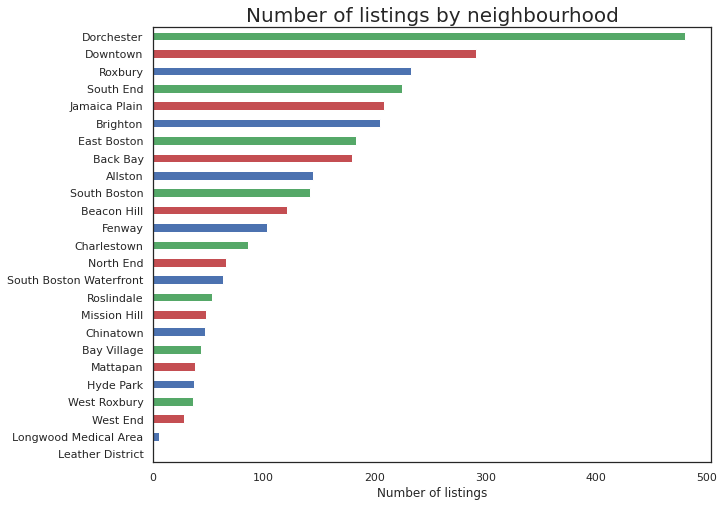

In [ ]:
feq=df_boston_listing_preprocessed.neighbourhood_cleansed.value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color = ["g","b","r"])
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.savefig('no_listing_neighbourhood.png', dpi=600, bbox_inches='tight')
plt.show()

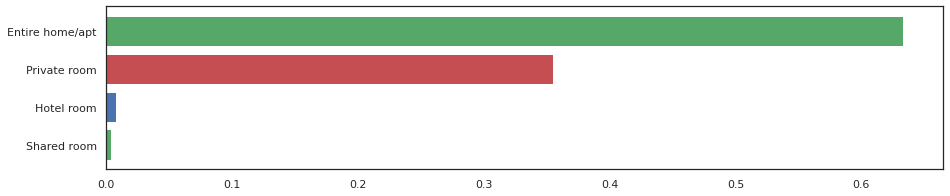

In [ ]:
room_types_count_pre = df_boston_listing_preprocessed['room_type'].value_counts()
freq = (room_types_count_pre/df_boston_listing_preprocessed.shape[0]).sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=0.8, color = ["g","b","r"])
plt.show()

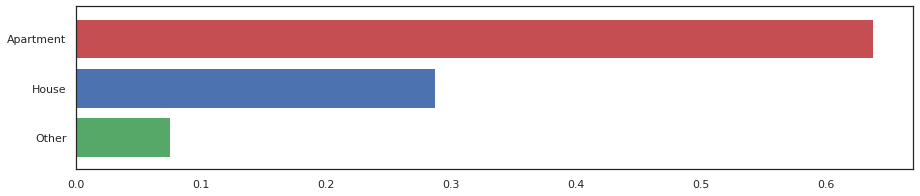

In [ ]:
neighbourhood_types_count_pre = df_boston_listing_preprocessed['property_type'].value_counts()
freq =(neighbourhood_types_count_pre/df_boston_listing_preprocessed.shape[0]).sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=0.8, color = ["g","b","r"])
plt.show()

In Below Graph, It can be seen that lot of central areas are expensive.

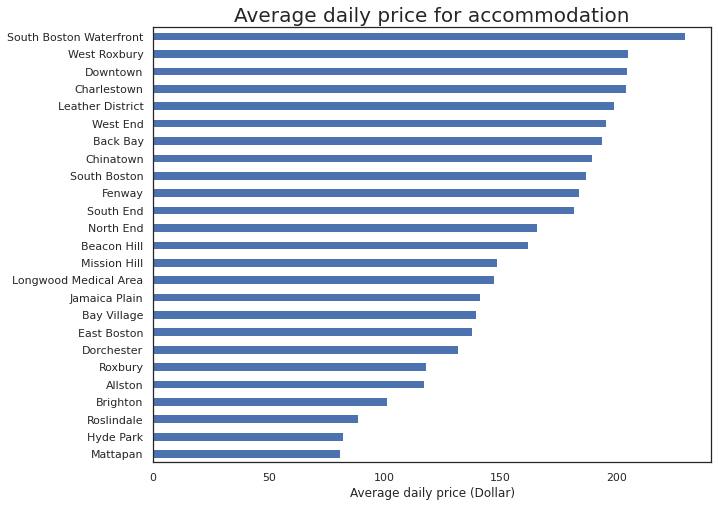

In [ ]:
#feq = df_boston_listing_preprocessed[df_boston_listing_preprocessed['accommodates']==2]
feq = df_boston_listing_preprocessed
feq = feq.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b')
plt.title("Average daily price for accommodation", fontsize=20)
plt.xlabel('Average daily price (Dollar)', fontsize=12)
plt.ylabel("")
plt.show()

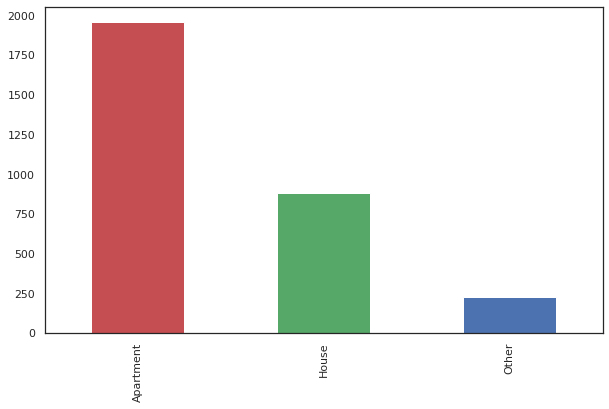

In [ ]:
# Getting Types of Property

neighbourhood_types_pre = df_boston_listing_preprocessed['property_type'].unique() #nunique()
neighbourhood_types_count_pre = df_boston_listing_preprocessed['property_type'].value_counts()
neighbourhood_types_count_pre.plot(kind='bar',figsize=(10,6),color = ["r","g","b"])

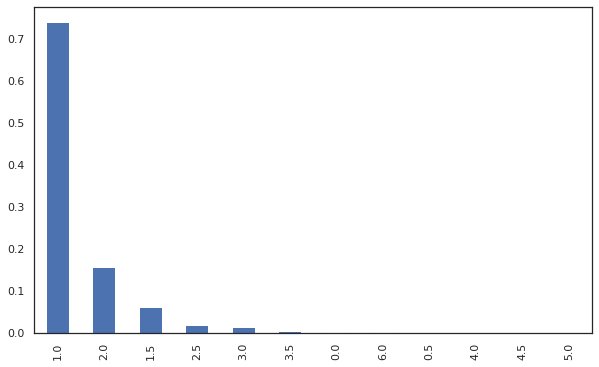

In [ ]:
# Getting Types of Bathrooms
bathroom_types_pre = df_boston_listing_preprocessed.bathrooms.unique() #nunique()
bathroom_types_count_pre = df_boston_listing_preprocessed.bathrooms.value_counts()
#bathroom_types_count_pre.sort_values(ascending=False).plot(kind='bar',figsize=(10,6))
(bathroom_types_count_pre/df_boston_listing_preprocessed.shape[0]).sort_values(ascending=False).plot(kind='bar',figsize=(10,6))

Distribution of room types in the Map

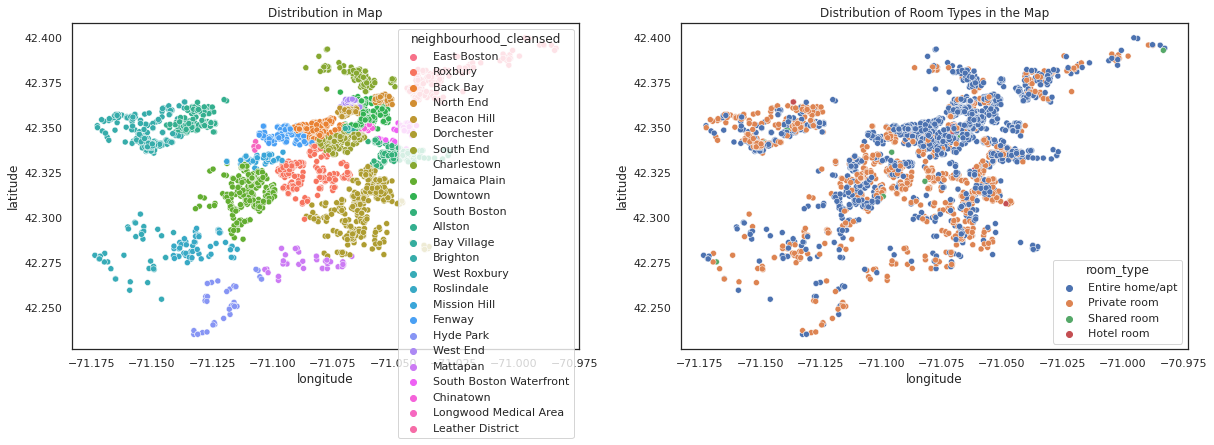

In [ ]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(121)
sns.scatterplot(df_boston_listing_preprocessed['longitude'], df_boston_listing_preprocessed['latitude'], hue=df_boston_listing_preprocessed['neighbourhood_cleansed'], ax=ax1)
ax1.set_title('Distribution in Map')

ax2 = fig.add_subplot(122)
sns.scatterplot(df_boston_listing_preprocessed['longitude'], df_boston_listing_preprocessed['latitude'], hue=df_boston_listing_preprocessed['room_type'], ax=ax2)
ax2.set_title('Distribution of Room Types in the Map')

plt.show()

Distribution of Room Types in Each Neighbourhood

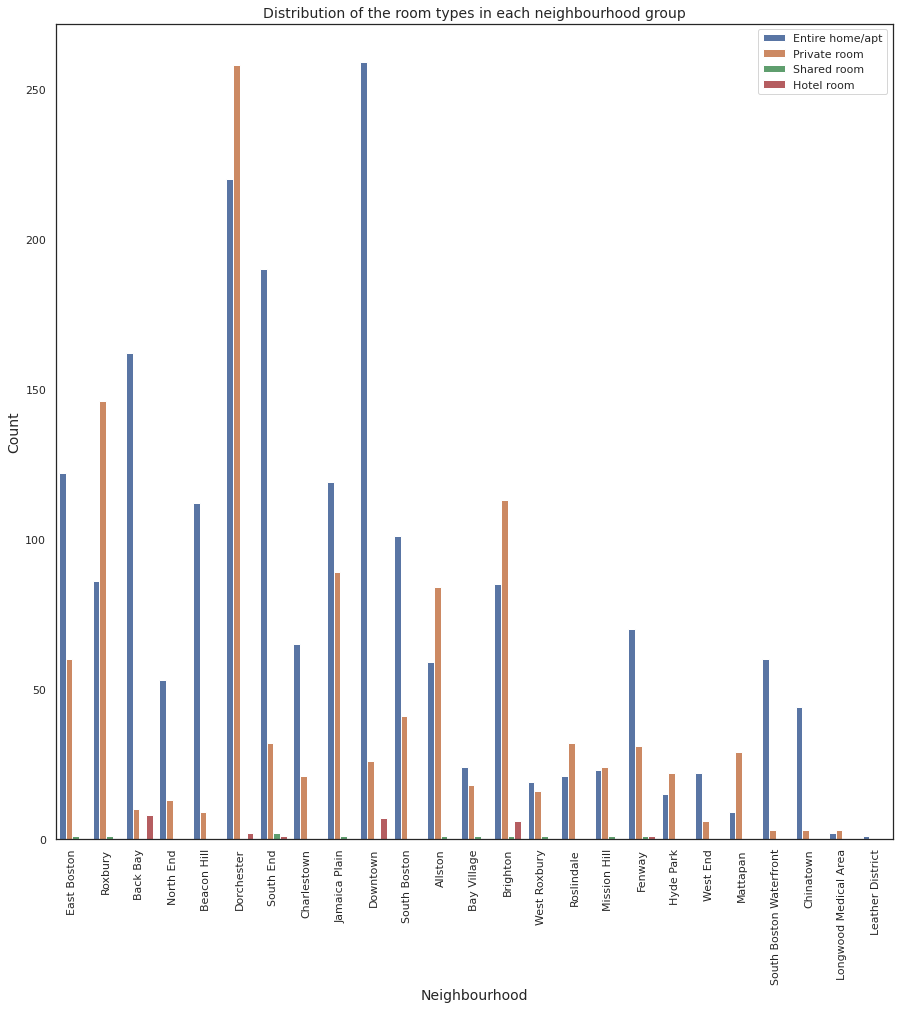

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x=df_boston_listing_preprocessed['neighbourhood_cleansed'], hue=df_boston_listing_preprocessed['room_type'])
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=14)                                             # Y Label
plt.xlabel('Neighbourhood',fontsize=14)                                     # X Label
plt.legend(loc='upper right')
plt.title('Distribution of the room types in each neighbourhood group',fontsize=14)
plt.show()

 Price Distribution in Each Neighbourhood

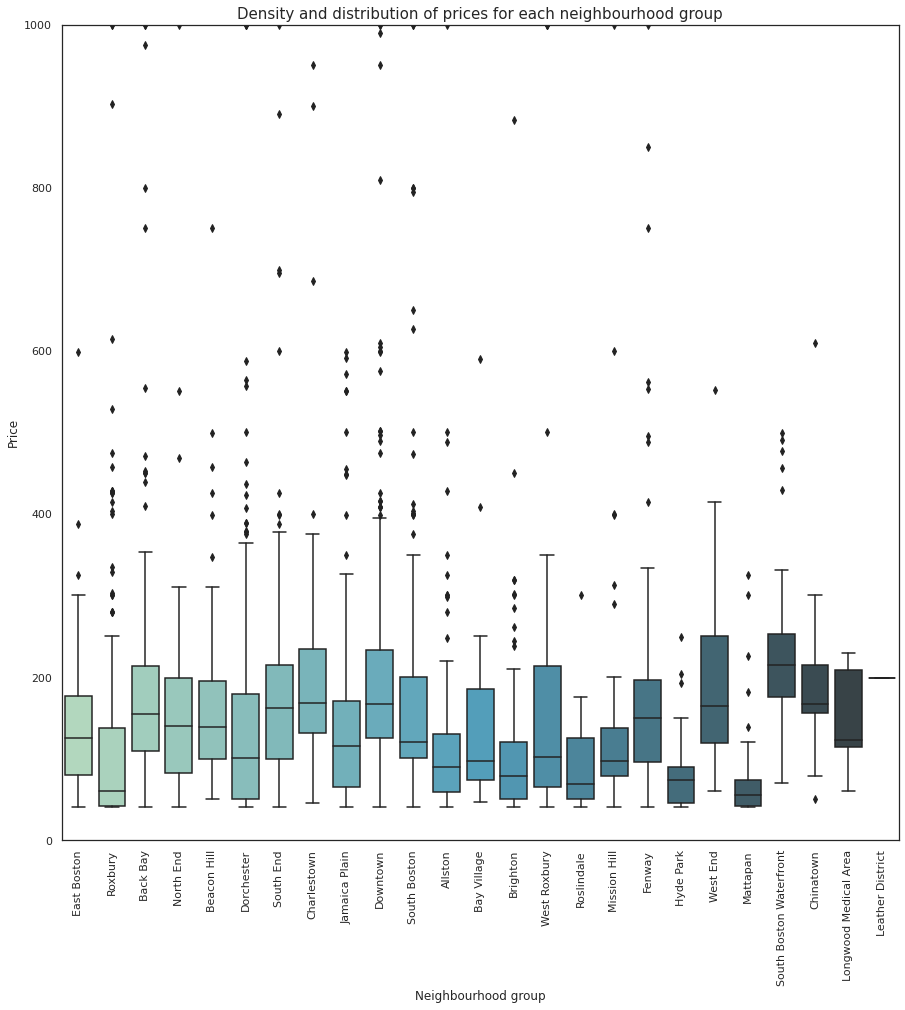

In [ ]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df_boston_listing_preprocessed, x='neighbourhood_cleansed', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.ylim(0,1000)
plt.show()

In [ ]:
"""
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed.price <= 40, 'price'] = 40

# Replacing values over $1000 with $1000
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed.price >= 1000, 'price'] = 1000
"""


"\ndf_boston_listing_preprocessed.loc[df_boston_listing_preprocessed.price <= 40, 'price'] = 40\n\n# Replacing values over $1000 with $1000\ndf_boston_listing_preprocessed.loc[df_boston_listing_preprocessed.price >= 1000, 'price'] = 1000\n"

In [ ]:
"""
plt.figure(figsize=(15,6))
sns.boxplot(data=df_boston_listing_preprocessed, x='room_type', y='price')
plt.title('Density and distribution of prices for each Room Type', fontsize=15)
plt.xlabel('Room Type')
plt.ylabel("Price")

"""

'\nplt.figure(figsize=(15,6))\nsns.boxplot(data=df_boston_listing_preprocessed, x=\'room_type\', y=\'price\')\nplt.title(\'Density and distribution of prices for each Room Type\', fontsize=15)\nplt.xlabel(\'Room Type\')\nplt.ylabel("Price")\n\n'

Distribution of the Rooms in the Map

In [ ]:
latitudes = np.array(df_boston_listing_preprocessed['latitude'])
longitudes = np.array(df_boston_listing_preprocessed['longitude'])
la_mean = latitudes.mean()
lo_mean = longitudes.mean()
locations = list(zip(latitudes, longitudes))

m = folium.Map(location=[la_mean, lo_mean], zoom_start= 11.5)
FastMarkerCluster(data=locations).add_to(m)
m

From above map as well as from below harplot, with no surprise we can say that, The total number of listing as well as most expensive neighbourhoods are in central boston.

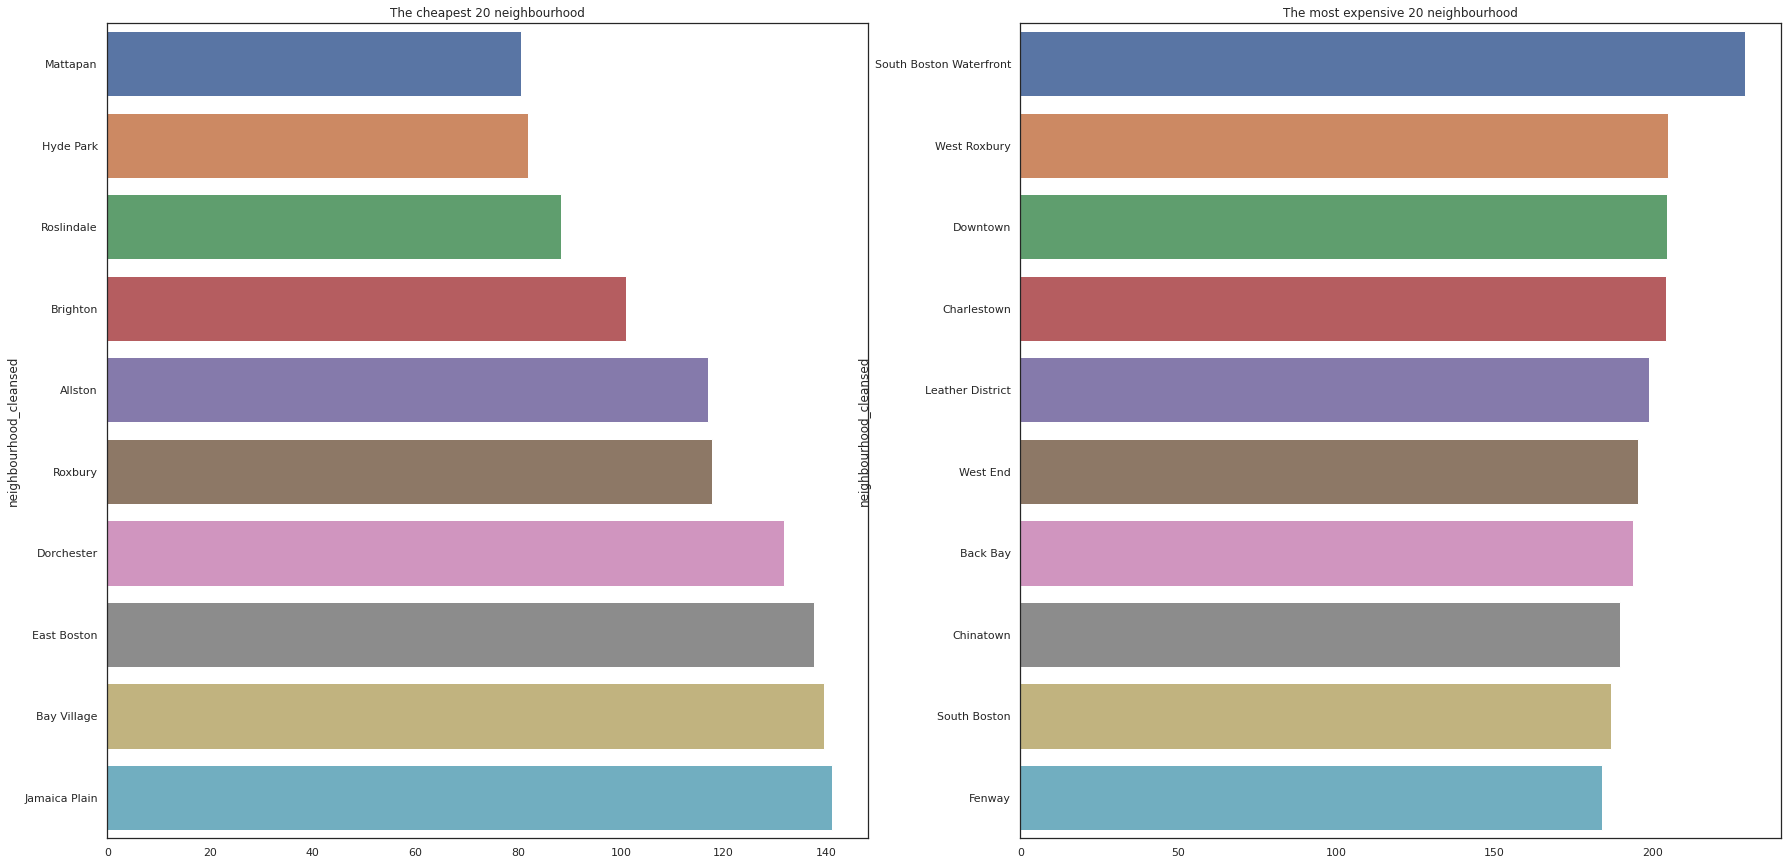

In [ ]:
a = df_boston_listing_preprocessed.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True).head(10)
d = df_boston_listing_preprocessed.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10)

fig = plt.figure(figsize=(30,15))

ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('The cheapest 20 neighbourhood')

ax2 = fig.add_subplot(122)
sns.barplot(y=d.index, x=d.values, ax=ax2)
ax2.set_title('The most expensive 20 neighbourhood')
plt.savefig('price_compare.png', dpi=600, bbox_inches='tight')
plt.show()

[]

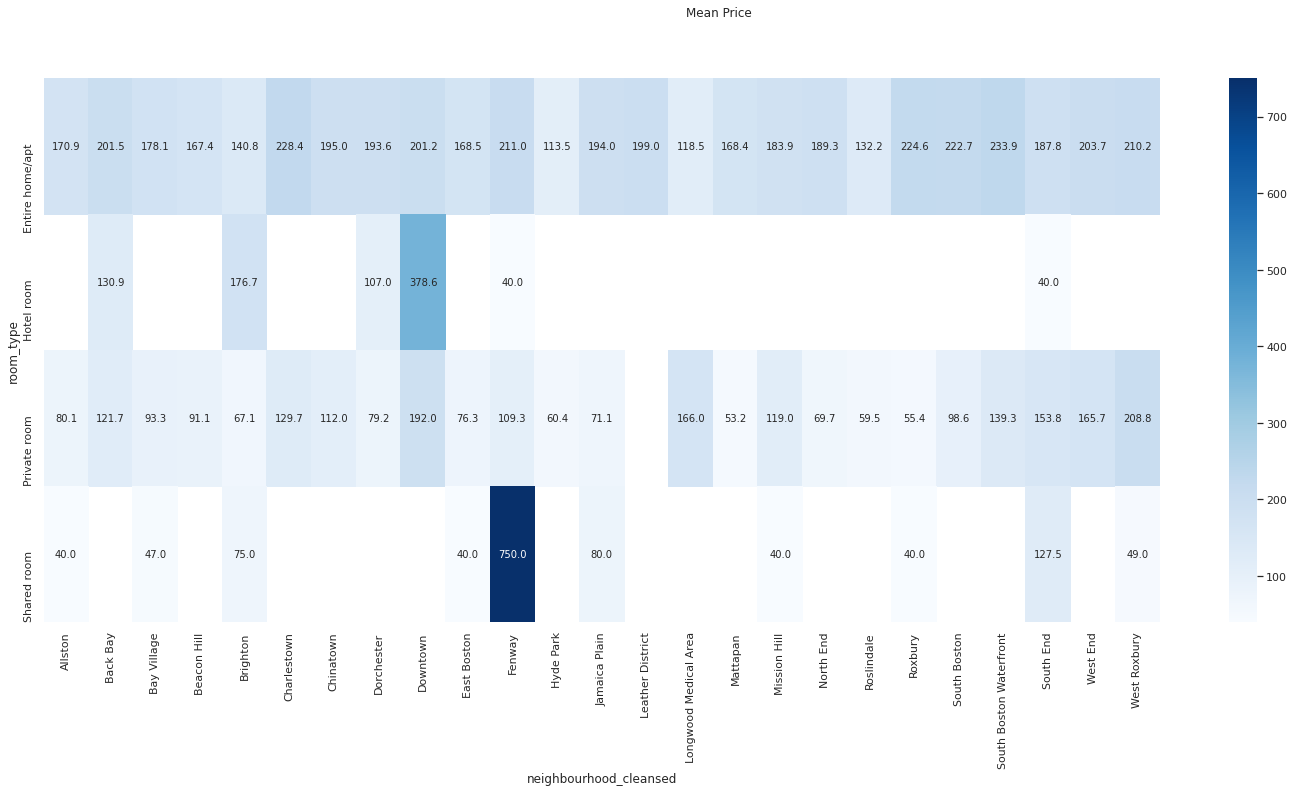

In [ ]:
plt.figure(figsize=(25,10))
df_pivot = df_boston_listing_preprocessed.pivot_table(values='price', index='room_type', columns='neighbourhood_cleansed', aggfunc='mean')
sns.heatmap(df_pivot, annot=True, fmt='.1f', cmap='Blues')
plt.suptitle('Mean Price')
plt.plot()

Host Joining vs First Review Plot.

There is big peak around 2017 and late 2020.

We think the peak around late 2020 for 'Host joining Airbnb' might be after relaxation of covid restrictions.With that same reasoning, we can see that there is significant increase in listing getting first review. 

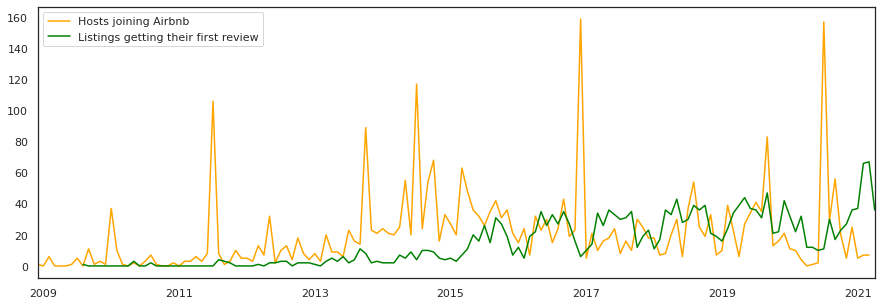

In [ ]:
plt.figure(figsize=(15,5))
df_boston_listing_preprocessed.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
df_boston_listing_preprocessed.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')

plt.legend()
plt.xlim('2008-12-01', '2021-04-30')
plt.xlabel('')
plt.ylabel('')
plt.savefig('review_timeseries.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(df_boston_listing_preprocessed.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(df_boston_listing_preprocessed.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df_boston_listing_preprocessed)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

In [ ]:
"""decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')"""

"decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')"

Number of Listing Per Host 


For now, There is no consistent Trend in this.

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


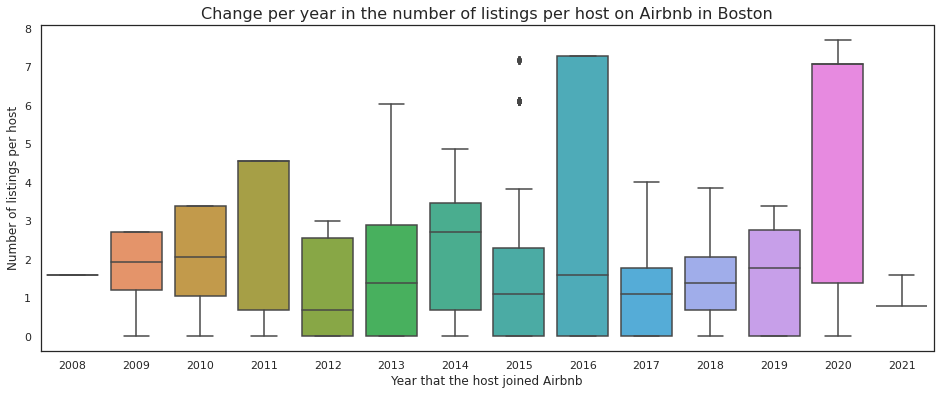

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(df_boston_listing_preprocessed.host_since.dt.year, np.log(df_boston_listing_preprocessed.host_listings_count)) # log-Transform
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host', fontsize=12) 
plt.title('Change per year in the number of listings per host on Airbnb in Boston', fontsize=16)
plt.savefig('changeperyearinnumer.png', dpi=600, bbox_inches='tight')
plt.show()

Average number of listings per host per year on Airbnb


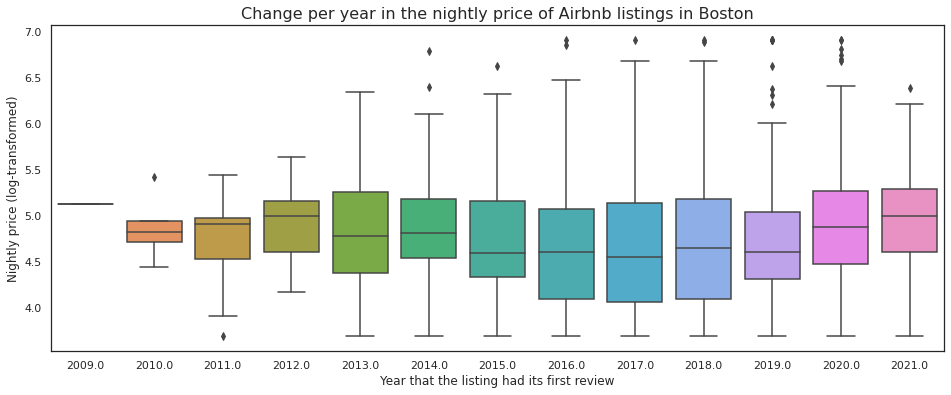

In [ ]:
print("Average number of listings per host per year on Airbnb")
round(df_boston_listing_preprocessed.set_index('host_since').host_listings_count.resample('YS').mean(),2)

# List of the largest host_listings_count and the year the host joined Airbnb
df_boston_listing_preprocessed.sort_values('host_listings_count').drop_duplicates('host_listings_count',keep='last').tail(10)[['host_since', 'host_listings_count']]

plt.figure(figsize=(16,6))
sns.boxplot(df_boston_listing_preprocessed.first_review.dt.year, np.log(df_boston_listing_preprocessed.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in Boston', fontsize=16)
plt.savefig('night_price_change.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
print("Mean nightly price of listings in each year on Airbnb in Boston")
print(round(df_boston_listing_preprocessed.set_index('first_review').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb in Boston
first_review
2009-01-01    169.00
2010-01-01    137.40
2011-01-01    123.44
2012-01-01    144.47
2013-01-01    165.19
2014-01-01    157.06
2015-01-01    139.23
2016-01-01    136.85
2017-01-01    133.72
2018-01-01    142.31
2019-01-01    136.82
2020-01-01    174.89
2021-01-01    172.85
Name: price, dtype: float64


In [ ]:
# Dropping host_since and first_review as they are no longer needed
df_boston_listing_preprocessed.drop(['host_since', 'first_review'], axis=1, inplace=True)

Numerical Features

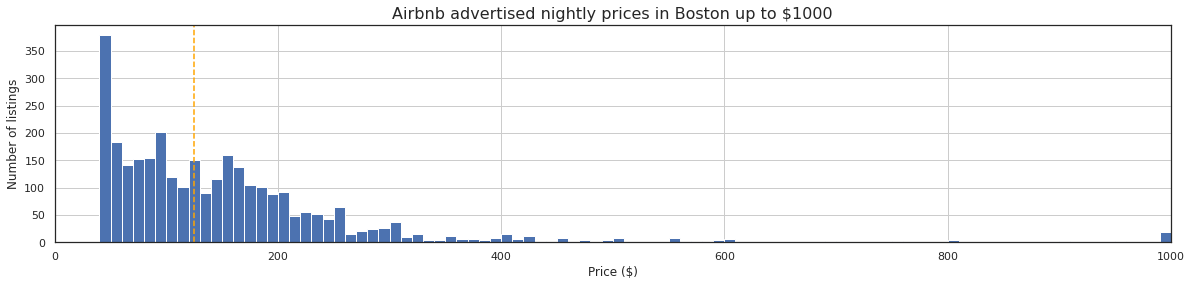

In [ ]:
# Checking OVerall Distribution of Prices and Comparison with Median Price

# Distribution of prices from $0 to $1000
plt.figure(figsize=(20,4))
df_boston_listing_preprocessed.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(np.median(df_boston_listing_preprocessed.price), color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in Boston up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

The extreme ends of the range are due to hosts not understanding how to use Airbnb advertised prices (sometimes called 'sticker' prices) correctly. The advertised prices can be set to any arbitrary amount, and these are the prices that show when dates are not entered on the site.

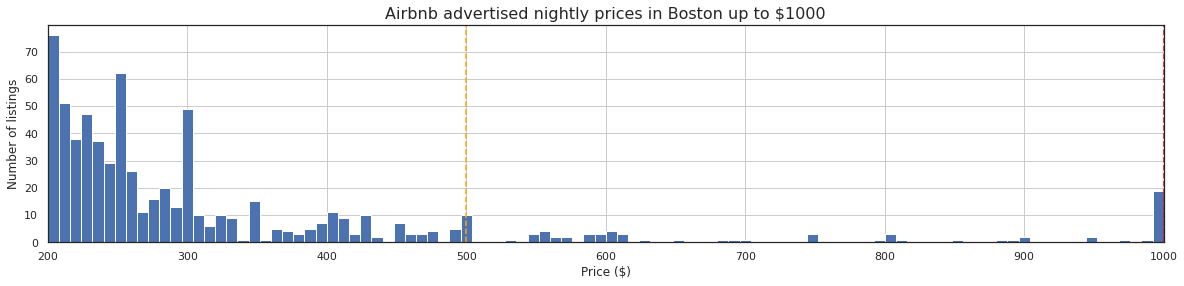

In [ ]:
# Distribution of prices from $200 upwards
plt.figure(figsize=(20,4))
df_boston_listing_preprocessed.price.hist(bins=100, range=(200, max(df_boston_listing_preprocessed.price)))
plt.margins(x=0)
plt.axvline(500, color='orange', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices in Boston up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

In [ ]:
"""
# Replacing values under $10 with $10
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed.price <= 10, 'price'] = 10

# Replacing values over $1000 with $1000
df_boston_listing_preprocessed.loc[df_boston_listing_preprocessed.price >= 1000, 'price'] = 1000
"""

"\n# Replacing values under $10 with $10\ndf_boston_listing_preprocessed.loc[df_boston_listing_preprocessed.price <= 10, 'price'] = 10\n\n# Replacing values over $1000 with $1000\ndf_boston_listing_preprocessed.loc[df_boston_listing_preprocessed.price >= 1000, 'price'] = 1000\n"

In [ ]:
df_boston_listing_preprocessed.price.mean()

154.1874185136897

In [ ]:
"""
# Distribution of prices from $200 upwards
plt.figure(figsize=(20,4))
df_boston_listing_preprocessed.price.hist(bins=100, range=(200, max(df_boston_listing_preprocessed.price)))
plt.margins(x=0)
plt.axvline(154, color='orange', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices in Boston up to $1000", fontsize=14)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()
"""

'\n# Distribution of prices from $200 upwards\nplt.figure(figsize=(20,4))\ndf_boston_listing_preprocessed.price.hist(bins=100, range=(200, max(df_boston_listing_preprocessed.price)))\nplt.margins(x=0)\nplt.axvline(154, color=\'orange\', linestyle=\'--\')\nplt.axvline(1000, color=\'red\', linestyle=\'--\')\nplt.title("Airbnb advertised nightly prices in Boston up to $1000", fontsize=14)\nplt.xlabel("Price ($)")\nplt.ylabel("Number of listings")\nplt.show()\n'

Median price of Airbnbs accommodating different number of guests

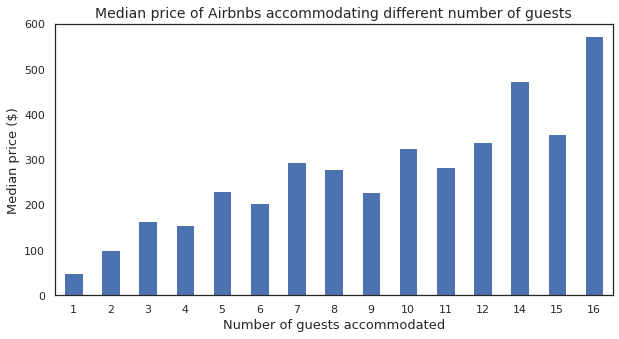

In [ ]:
plt.figure(figsize=(10,5))
df_boston_listing_preprocessed.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

Host listing count


Question: how many listings do hosts have on average? How many multi-listing hosts are there?

In [ ]:
print("Median number of listings per host:", int(df_boston_listing_preprocessed.host_listings_count.median()))
print("Mean number of listings per host:", int(round(df_boston_listing_preprocessed.host_listings_count.mean())))
print(f"{int(round(100*len(df_boston_listing_preprocessed[df_boston_listing_preprocessed.host_listings_count == 1])/len(df_boston_listing_preprocessed)))}% of listings are from hosts with one listing.")

Median number of listings per host: 5
Mean number of listings per host: 189
20% of listings are from hosts with one listing.



Number of people accommodated, bathrooms, bedrooms and beds

Question: what are the average number of people accommodated, bathrooms, bedrooms and beds in Airbnb listings in London, and how do prices differ?

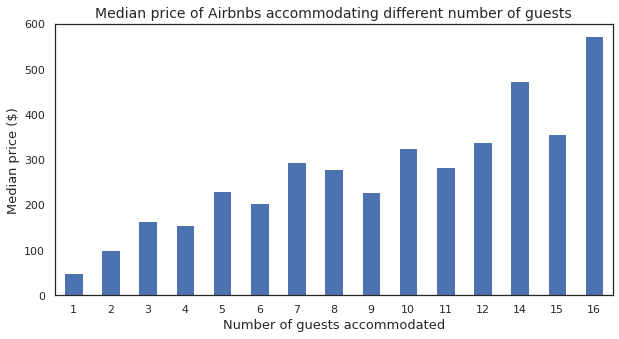

In [ ]:
plt.figure(figsize=(10,5))
df_boston_listing_preprocessed.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

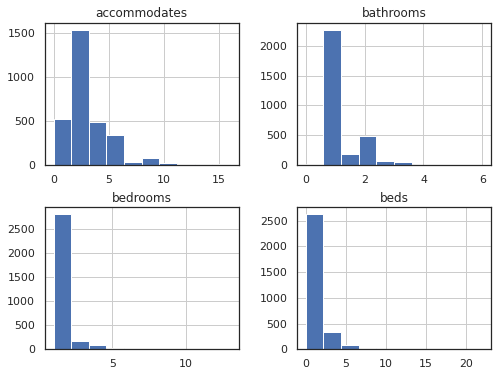

In [ ]:
df_boston_listing_preprocessed[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6));

Categorical Features

Property and room types

Question: what are the most common property and room types?

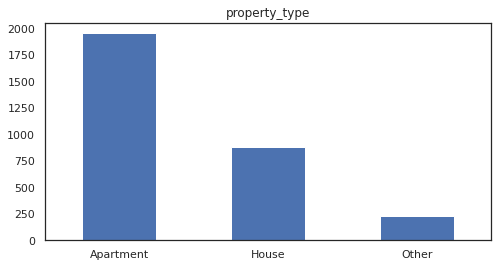

Apartment    0.637549
House        0.287484
Other        0.074967
Name: property_type, dtype: float64


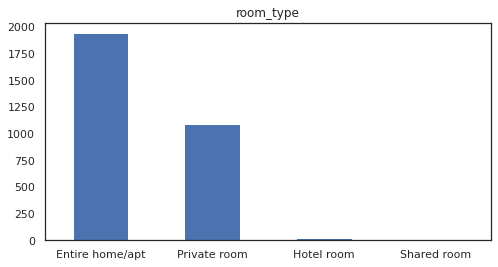

Entire home/apt    0.633312
Private room       0.354954
Hotel room         0.008149
Shared room        0.003585
Name: room_type, dtype: float64


In [ ]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df_boston_listing_preprocessed[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(8,4))
    print(df_boston_listing_preprocessed[col].value_counts(normalize=True))

Reviews

Question: what is the distribution of reviews like?

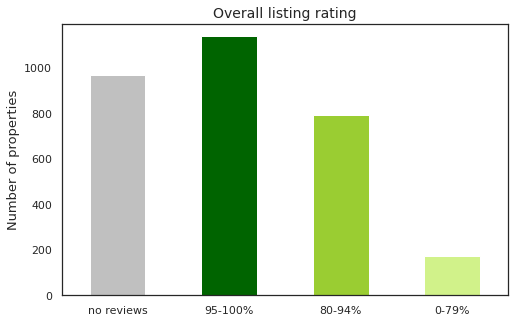

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)
df_boston_listing_preprocessed['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['silver', 'darkgreen', 'yellowgreen', '#d1f28a' ], ax=ax)
ax.set_xticklabels(labels=['no reviews', '95-100%', '80-94%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

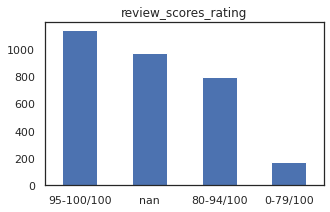

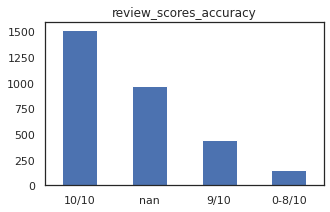

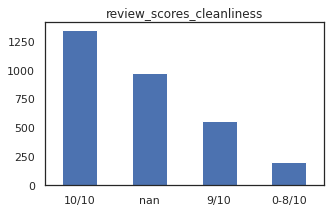

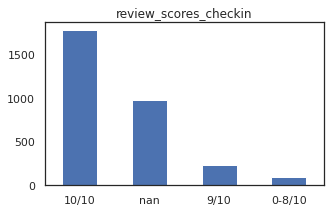

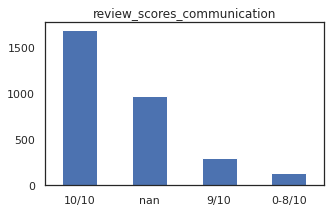

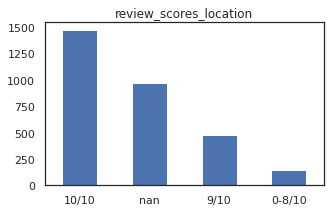

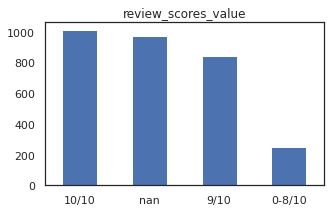

In [ ]:
for col in list(df_boston_listing_preprocessed.columns[df_boston_listing_preprocessed.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

First and last reviews

Question: how long have listings been on the site, and how many listings have been reviewed recently?

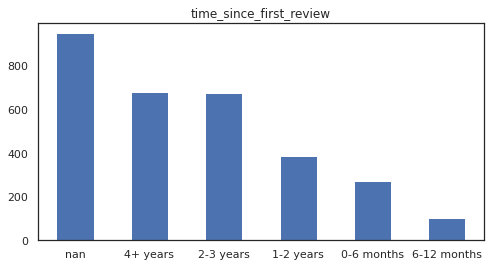

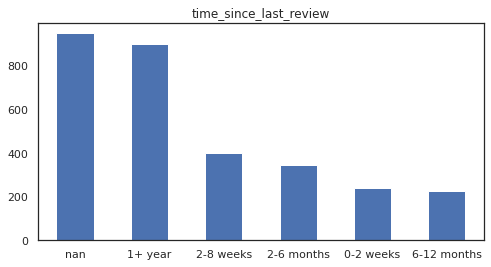

In [ ]:
for col in ['time_since_first_review', 'time_since_last_review']:
    category_count_plot(col)

Checking if having SuperHost really affects the Listing Price ?

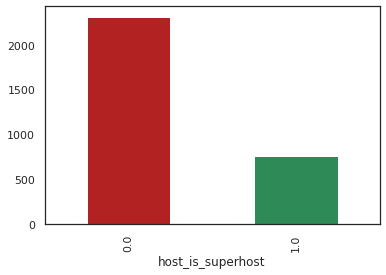

In [ ]:
df_boston_listing_preprocessed.groupby(df_boston_listing_preprocessed.host_is_superhost).size().plot(kind='bar', color=['firebrick', 'seagreen'])

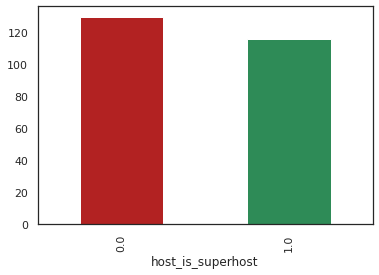

In [ ]:
df_boston_listing_preprocessed.groupby(df_boston_listing_preprocessed.host_is_superhost).price.median().plot(kind='bar', color=['firebrick', 'seagreen'])

From above two plots, it can be concluded that having superhost is not crucial while deciding the listing price.

How many hosts are verified ?

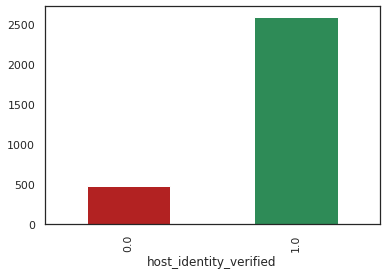

In [ ]:
df_boston_listing_preprocessed.groupby(df_boston_listing_preprocessed.host_identity_verified).size().plot(kind='bar', color=['firebrick', 'seagreen'])

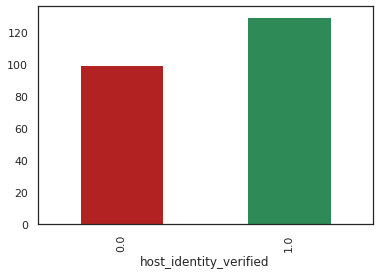

In [ ]:
df_boston_listing_preprocessed.groupby(df_boston_listing_preprocessed.host_identity_verified).price.median().plot(kind='bar', color=['firebrick', 'seagreen'])

#Preparing Data for Modeling

In [ ]:
df_boston_listing_preprocessed.head(3)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_90,calendar_last_scraped,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,host_days_active,time_since_first_review,time_since_last_review,air_conditioning,gym,tv,bbq,nature_and_views,bed_linen,coffee_machine,cooking_basics,white_goods,elevator,parking,outdoor_space,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance,secure,toiletries,workspace,refrigerator
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3781,within a day,100%,41%,0.0,5.0,1.0,0.0,East Boston,42.36413,-71.02991,Apartment,Entire home/apt,2,1.0,1.0,0.0,125.0,32,1125,1,1,2021-04-21,19,0,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,4524.0,4+ years,2-8 weeks,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
6695,unknown,Not Known,NaN,1.0,4.0,1.0,1.0,Roxbury,42.32802,-71.09387,House,Entire home/apt,4,1.0,1.0,1.0,169.0,29,730,1,40,2021-04-21,115,0,95-100/100,10/10,10/10,10/10,10/10,9/10,10/10,0,4446.0,4+ years,1+ year,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
10813,within a few hours,90-99%,17%,0.0,15.0,1.0,1.0,Back Bay,42.35061,-71.08787,Apartment,Entire home/apt,3,1.0,1.0,1.0,96.0,29,1125,1,63,2021-04-23,5,0,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,4237.0,4+ years,2-6 months,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Lists that will be manipulated in the data processing
list_columns = []
list_categorical_col = []
list_numerical_col = []

In [ ]:
def get_col(df: 'dataframe', type_descr: 'numpy') -> list:
    """
    Function get list columns 
    
    Args:
    type_descr
        np.number, np.object -> return list with all columns
        np.number            -> return list numerical columns 
        np.object            -> return list object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')    
    else:
        return col.tolist()

In [ ]:
list_numerical_col = get_col(df=df_boston_listing_preprocessed,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_boston_listing_preprocessed,
                               type_descr=np.object)
list_columns = get_col(df=df_boston_listing_preprocessed,
                       type_descr=[np.object, np.number])

In [ ]:
"""
for feature in list_categorical_col:
    le = preprocessing.LabelEncoder()
    df_train_scaled_encoded[feature] = le.fit_transform(df_train_scaled_encoded[feature])
    df_test_scaled_encoded[feature] = le.transform(df_test_scaled_encoded[feature])
"""    

'\nfor feature in list_categorical_col:\n    le = preprocessing.LabelEncoder()\n    df_train_scaled_encoded[feature] = le.fit_transform(df_train_scaled_encoded[feature])\n    df_test_scaled_encoded[feature] = le.transform(df_test_scaled_encoded[feature])\n'

Normal Code Below

In [ ]:
"""
from sklearn.preprocessing import LabelEncoder

#categorical = df_boston_listing_preprocessed.select_dtypes(include=['object']).columns

for i in list_categorical_col:
  transformed_df[i] = LabelEncoder().fit_transform(df_boston_listing_preprocessed[i])


transformed_df.dtypes
"""

"\nfrom sklearn.preprocessing import LabelEncoder\n\n#categorical = df_boston_listing_preprocessed.select_dtypes(include=['object']).columns\n\nfor i in list_categorical_col:\n  transformed_df[i] = LabelEncoder().fit_transform(df_boston_listing_preprocessed[i])\n\n\ntransformed_df.dtypes\n"

In [ ]:
transformed_df = pd.get_dummies(df_boston_listing_preprocessed)

In [ ]:
transformed_df.head(3)

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,number_of_reviews_l30d,instant_bookable,host_days_active,air_conditioning,gym,tv,bbq,nature_and_views,bed_linen,coffee_machine,cooking_basics,white_goods,elevator,parking,outdoor_space,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance,secure,toiletries,workspace,refrigerator,host_response_time_a few days or more,...,review_scores_rating_0-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_rating_nan,review_scores_accuracy_0-8/10,review_scores_accuracy_10/10,review_scores_accuracy_9/10,review_scores_accuracy_nan,review_scores_cleanliness_0-8/10,review_scores_cleanliness_10/10,review_scores_cleanliness_9/10,review_scores_cleanliness_nan,review_scores_checkin_0-8/10,review_scores_checkin_10/10,review_scores_checkin_9/10,review_scores_checkin_nan,review_scores_communication_0-8/10,review_scores_communication_10/10,review_scores_communication_9/10,review_scores_communication_nan,review_scores_location_0-8/10,review_scores_location_10/10,review_scores_location_9/10,review_scores_location_nan,review_scores_value_0-8/10,review_scores_value_10/10,review_scores_value_9/10,review_scores_value_nan,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_first_review_nan,time_since_last_review_0-2 weeks,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_2-8 weeks,time_since_last_review_6-12 months,time_since_last_review_nan
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3781,0.0,5.0,1.0,0.0,42.36413,-71.02991,2,1.0,1.0,0.0,125.0,32,1125,1,1,19,0,0,4524.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,...,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
6695,1.0,4.0,1.0,1.0,42.32802,-71.09387,4,1.0,1.0,1.0,169.0,29,730,1,40,115,0,0,4446.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,...,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
10813,0.0,15.0,1.0,1.0,42.35061,-71.08787,3,1.0,1.0,1.0,96.0,29,1125,1,63,5,0,0,4237.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,...,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

In [ ]:
#multi_collinearity_heatmap(transformed_df, figsize=(40,25))

In [ ]:
tr_df = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('borough')]), axis=1)
tr_df = tr_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('host')]), axis=1)
tr_df = tr_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('neighbourhood')]), axis=1)
tr_df = tr_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('time')]), axis=1)

In [ ]:
#multi_collinearity_heatmap(tr_df, figsize=(40,25))

In [ ]:
#tr_df.columns

In [ ]:
"""
transformed_df = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('borough')]), axis=1)
transformed_df = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('host')]), axis=1)
transformed_df = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('neighbourhood')]), axis=1)
transformed_df = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('time')]), axis=1)
"""

"\ntransformed_df = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('borough')]), axis=1)\ntransformed_df = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('host')]), axis=1)\ntransformed_df = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('neighbourhood')]), axis=1)\ntransformed_df = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('time')]), axis=1)\n"

In [ ]:
# Dropping collinear features
to_drop = ['beds',
           'bedrooms',
           'property_type_Apartment',
           'room_type_Private room',
           'review_scores_accuracy_nan','review_scores_cleanliness_nan', 'review_scores_checkin_nan',
           'review_scores_communication_nan','review_scores_location_nan','review_scores_value_nan',
           'calendar_last_scraped_2021-04-20', 'calendar_last_scraped_2021-04-21',
           'calendar_last_scraped_2021-04-22', 'calendar_last_scraped_2021-04-23',
           'nature_and_views','coffee_machine','review_scores_accuracy_0-8/10','review_scores_cleanliness_0-8/10',
           'review_scores_checkin_0-8/10','review_scores_communication_0-8/10','review_scores_location_0-8/10',
           'review_scores_value_0-8/10','review_scores_accuracy_10/10','review_scores_cleanliness_10/10','review_scores_checkin_10/10',
           'review_scores_communication_10/10','review_scores_location_10/10','review_scores_value_10/10','review_scores_accuracy_9/10',
           'review_scores_cleanliness_9/10','review_scores_checkin_9/10','review_scores_communication_9/10','review_scores_location_9/10',
           'review_scores_value_9/10','hot_tub_sauna_or_pool']

to_drop.extend(list(tr_df.columns[tr_df.columns.str.endswith('nan')]))

tr_df.drop(to_drop, axis=1, inplace=True)

In [ ]:
#multi_collinearity_heatmap(tr_df, figsize=(40,25))

There are still some fairly strong correlations between highly rated properties of different reviews categories

In [ ]:
transformed_df = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('borough')]), axis=1)
transformed_df = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('host')]), axis=1)
transformed_df = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('neighbourhood')]), axis=1)
transformed_df = transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('time')]), axis=1)

In [ ]:
# Dropping collinear features
to_drop = ['beds',
           'bedrooms',
           'property_type_Apartment',
           'room_type_Private room',
           'review_scores_accuracy_nan','review_scores_cleanliness_nan', 'review_scores_checkin_nan',
           'review_scores_communication_nan','review_scores_location_nan','review_scores_value_nan',
           'calendar_last_scraped_2021-04-20', 'calendar_last_scraped_2021-04-21',
           'calendar_last_scraped_2021-04-22', 'calendar_last_scraped_2021-04-23',
           'nature_and_views','coffee_machine','review_scores_accuracy_0-8/10','review_scores_cleanliness_0-8/10',
           'review_scores_checkin_0-8/10','review_scores_communication_0-8/10','review_scores_location_0-8/10',
           'review_scores_value_0-8/10','review_scores_accuracy_10/10','review_scores_cleanliness_10/10','review_scores_checkin_10/10',
           'review_scores_communication_10/10','review_scores_location_10/10','review_scores_value_10/10','review_scores_accuracy_9/10',
           'review_scores_cleanliness_9/10','review_scores_checkin_9/10','review_scores_communication_9/10','review_scores_location_9/10',
           'review_scores_value_9/10','hot_tub_sauna_or_pool']

to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('nan')]))

transformed_df.drop(to_drop, axis=1, inplace=True)

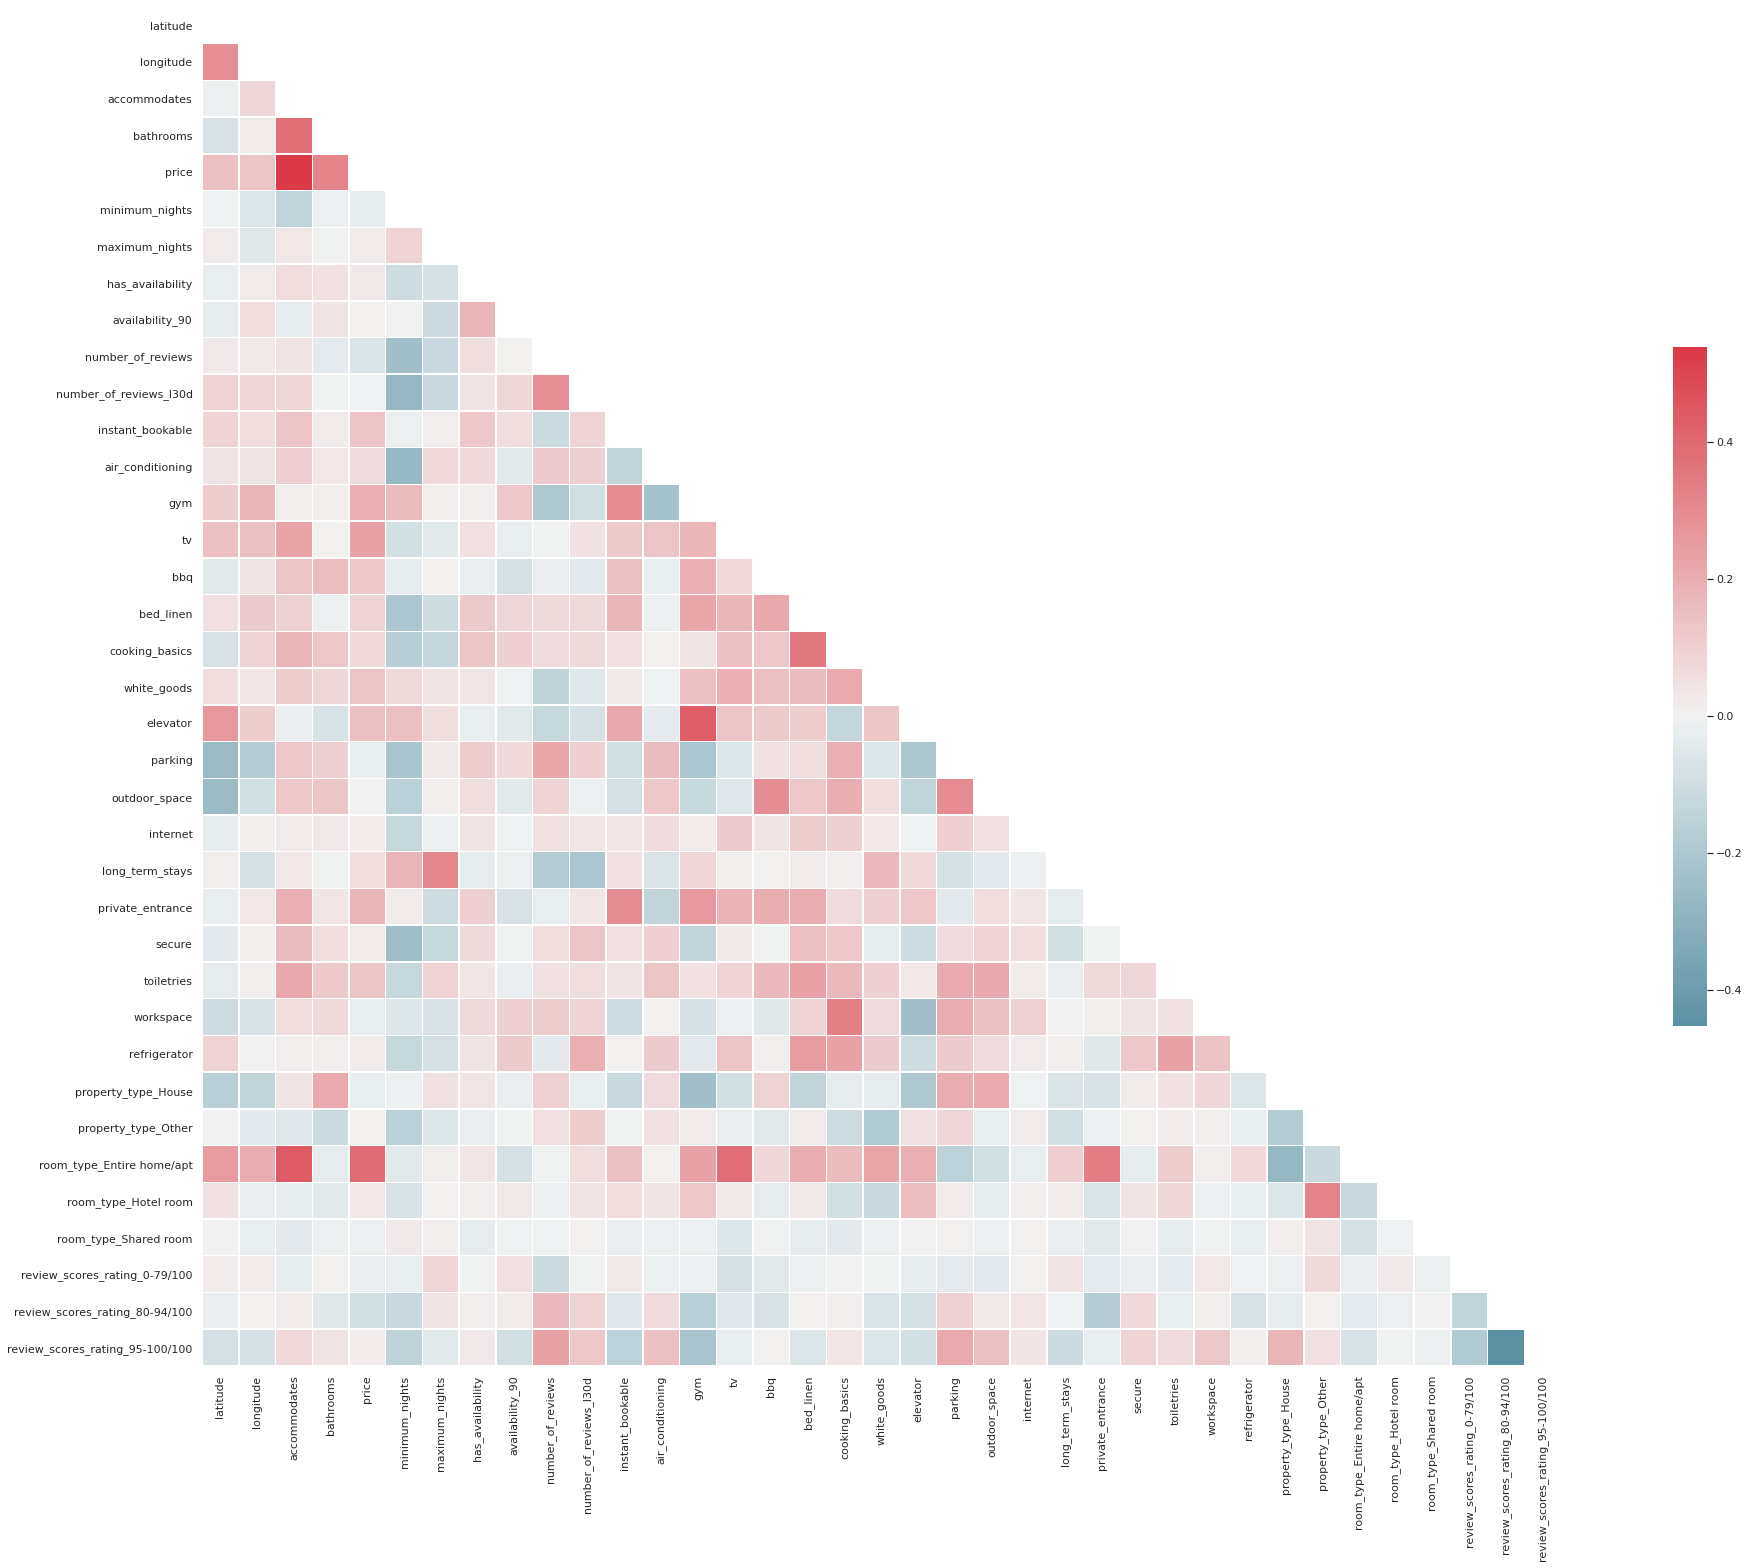

In [ ]:
multi_collinearity_heatmap(transformed_df, figsize=(40,25))

Log Transformation , Standardising

In [ ]:
numerical_columns = ['accommodates', 'availability_90', 'bathrooms','maximum_nights', 'minimum_nights', 'number_of_reviews', 'price']

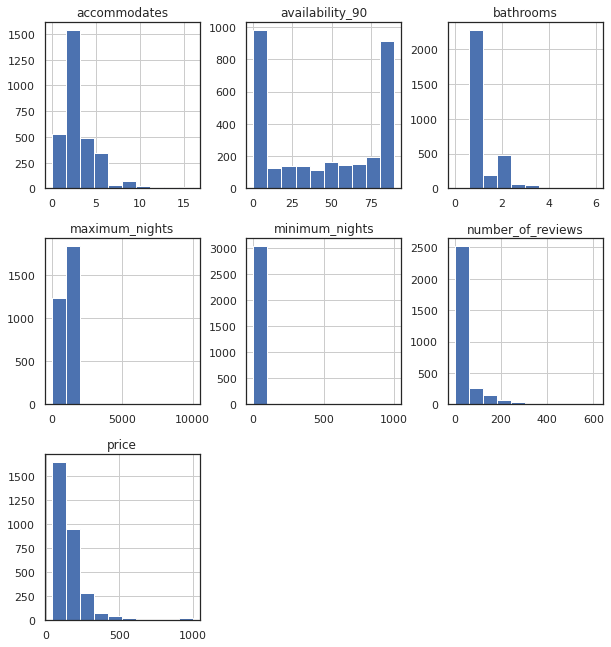

In [ ]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [ ]:

# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_90','price']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])
 

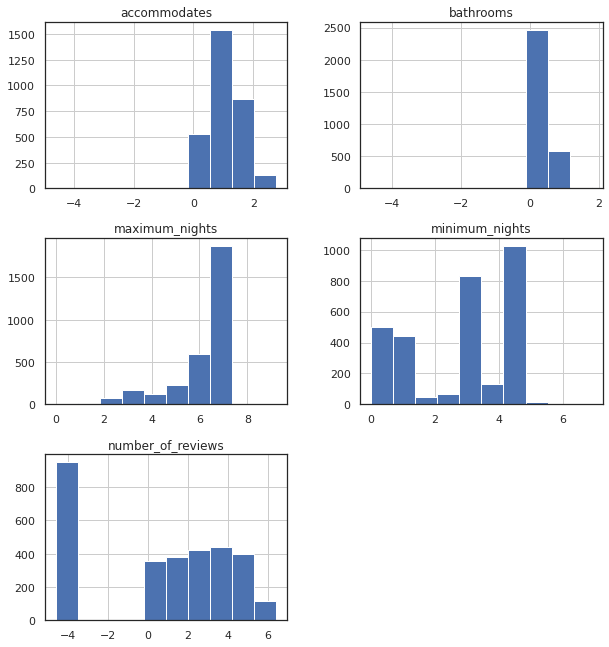

In [ ]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [ ]:
# Separating X and y
X = transformed_df.drop('price', axis=1)
y = transformed_df.price


In [ ]:
X.head(3)

,latitude,longitude,accommodates,bathrooms,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,number_of_reviews_l30d,instant_bookable,air_conditioning,gym,tv,bbq,bed_linen,cooking_basics,white_goods,elevator,parking,outdoor_space,internet,long_term_stays,private_entrance,secure,toiletries,workspace,refrigerator,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room,review_scores_rating_0-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3781,42.36413,-71.02991,0.693147,0.0,3.465736,7.025538,1,1,2.944439,0,0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,1
6695,42.32802,-71.09387,1.386294,0.0,3.367296,6.593045,1,40,4.744932,0,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0,0,0,0,1
10813,42.35061,-71.08787,1.098612,0.0,3.367296,7.025538,1,63,1.609438,0,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,1


In [ ]:
columns = X.columns
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [ ]:
X_train.shape

(2147, 36)

In [ ]:
X_test.shape

(921, 36)

In [ ]:
y_train.shape

(2147,)

In [ ]:
def plot_all_r2():
  length = len(prediction_dictionaries)
  n_col = 2
  if length < 2:
    n_col = length % 2
  
  nrow = 1
  if(length > 2):
    nrow = int(length / 2) 
    if length % 2 != 0:
      nrow+=1
  
  fig, axes = plt.subplots(nrow, n_col, figsize=( 16, 3 * length))
  for ax, key in zip(axes.flatten(), prediction_dictionaries.keys()):
    sns.regplot(prediction_dictionaries[key], y_test, ax=ax)
    ax.set_title("The correlation line in {}".format(key))
  plt.show()

# KNN

In [ ]:
# Generate a kNN model
knn_model = neighbors.KNeighborsRegressor()
print(knn_model.get_params())

# Distance and Weight Array
n = np.arange(1,21)
dist = np.array(['euclidean', 'manhattan'])
weight = np.array(['uniform', 'distance'])

#Finding Best Performing Parameters
results = pd.DataFrame(columns = ['#neighbors','distance', 'weight', 'rmse'])
index = 0
for i in n:
  for j in dist:
    for k in weight:
      knn_model = neighbors.KNeighborsRegressor(n_neighbors=i, metric=j, weights=k)
      knn_model.fit(X_train, y_train)
      pred = knn_model.predict(X_test)
      rmse = mean_squared_error(y_test, pred, squared=False)
      results.loc[index] = [i,j,k,rmse]
      index +=1
print('Best performing model')      
print(tabulate(results[results['rmse']==results['rmse'].min()], headers = 'keys', tablefmt = 'psql'))
print('All results')
print(tabulate(results, headers = 'keys', tablefmt = 'psql'))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best performing model
+----+--------------+------------+----------+---------+
|    |   #neighbors | distance   | weight   |    rmse |
|----+--------------+------------+----------+---------|
| 27 |            7 | manhattan  | distance | 99.4006 |
+----+--------------+------------+----------+---------+
All results
+----+--------------+------------+----------+----------+
|    |   #neighbors | distance   | weight   |     rmse |
|----+--------------+------------+----------+----------|
|  0 |            1 | euclidean  | uniform  | 122.738  |
|  1 |            1 | euclidean  | distance | 122.738  |
|  2 |            1 | manhattan  | uniform  | 119.289  |
|  3 |            1 | manhattan  | distance | 119.289  |
|  4 |            2 | euclidean  | uniform  | 103.104  |
|  5 |            2 | euclidean  | distance | 103.848  |
|  6 |            2 | ma

In [ ]:
print('Best performing model')      
print(tabulate(results[results['rmse']==results['rmse'].min()], headers = 'keys', tablefmt = 'psql'))

Best performing model
+----+--------------+------------+----------+---------+
|    |   #neighbors | distance   | weight   |    rmse |
|----+--------------+------------+----------+---------|
| 27 |            7 | manhattan  | distance | 99.4006 |
+----+--------------+------------+----------+---------+


In [ ]:
# Prediction

knn_model = neighbors.KNeighborsRegressor(n_neighbors=7, metric="manhattan", weights="distance")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

prediction_dictionaries = {'KNN': y_pred}

prediction_list = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'KNN': y_pred.flatten()}).head(20)
prediction_list.set_index('Actual Values', inplace=True)
prediction_list

,KNN
Actual Values,
231.0,126.836133
65.0,119.915590
45.0,86.760114
80.0,110.140818
175.0,228.778231
40.0,72.585735
149.0,121.383060
699.0,201.703115
42.0,40.000000


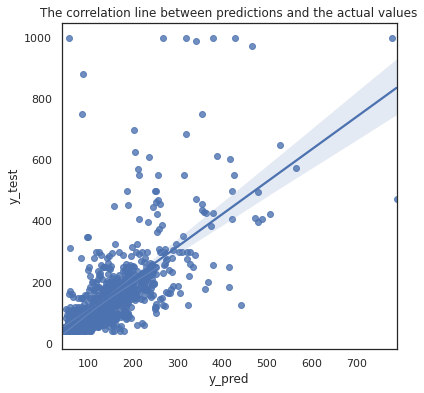

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x= y_pred, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.savefig('knnline.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
mae_knn = mean_absolute_error(y_test, y_pred)
rmse_knn = mean_squared_error(y_test, y_pred, squared = False)

print('MAE: ', mae_knn)
print('RMSE: ',rmse_knn)
#print('Training R^2 Value: ', knn_model.score(X_train, y_train))
#print('Validation R^2 Value: ', r2_score(y_test, y_pred))

MAE:  49.475600645732015
RMSE:  99.4006071712808


KNN Cross Validation

In [ ]:
kmdl= neighbors.KNeighborsRegressor(n_neighbors=5)
scores = cross_val_score(kmdl, transformed_df.drop('price', axis=1), transformed_df.price, cv=5, scoring='neg_root_mean_squared_error')
print('scores: ',scores)
print('Mean RMSE: ', -np.mean(scores))

scores:  [-115.68976824 -105.52873113 -126.65312628 -123.56417965 -138.885123  ]
Mean RMSE:  122.06418566082061


KNN Grid Search with cross validation

In [ ]:
# Generate a kNN model
knn_model = neighbors.KNeighborsRegressor()
print(knn_model.get_params())

# Give parameter values
parameters = {'n_neighbors':np.arange(1,21), 'metric': ['euclidean', 'manhattan'], 'weights': ['uniform', 'distance']}

# Grid search best model
optimized_model = GridSearchCV(knn_model, parameters, cv=5, scoring='neg_root_mean_squared_error' )
optimized_model.fit(transformed_df.drop('price', axis=1), transformed_df.price)

# Result
results = pd.DataFrame(optimized_model.cv_results_)
print(tabulate(results, headers = 'keys', tablefmt = 'psql'))

# Best Scores
print('Best score: ',optimized_model.best_score_)
print('Best parameters: ',optimized_model.best_params_)
print('Best estimator: ',optimized_model.best_estimator_)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
+----+-----------------+----------------+-------------------+------------------+----------------+---------------------+-----------------+-------------------------------------------------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------+
|    |   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time | param_metric   |   param_n_neighbors | param_weights   | params                                                            |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |
|----+-----------------+----------------+-------------------+------------------+----------------+----

Randomized search with cross validation method

In [ ]:
# Randomized search best model
optimized_model = RandomizedSearchCV(knn_model, parameters, cv=5,  scoring='neg_root_mean_squared_error')
optimized_model.fit(transformed_df.drop('price', axis=1), transformed_df.price)

results = pd.DataFrame(optimized_model.cv_results_)
print(tabulate(results, headers = 'keys', tablefmt = 'psql'))

# Best Scores
print('Best score: ',optimized_model.best_score_)
print('Best parameters: ',optimized_model.best_params_)
print('Best estimator: ',optimized_model.best_estimator_)

+----+-----------------+----------------+-------------------+------------------+-----------------+---------------------+----------------+-------------------------------------------------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------+
|    |   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time | param_weights   |   param_n_neighbors | param_metric   | params                                                            |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |
|----+-----------------+----------------+-------------------+------------------+-----------------+---------------------+----------------+-------------------------------------------------------------------+---------------------+---------------------+-

Applying pipeline with hold out method for prediction

As Seen from pipeline results, dataset only needs to be scaled. Applying PCA is not the efficient way.

In [ ]:
pipe_kNN_scaled = Pipeline (steps = [ ('model',neighbors.KNeighborsRegressor(n_neighbors=5))])
#pipe_kNN_scaled = Pipeline (steps = [('Scaler', StandardScaler()), ('model',neighbors.KNeighborsRegressor(n_neighbors=5))])
pipe_kNN_scaled_pca = Pipeline (steps = [('Scaler', StandardScaler()), ('pca',PCA(n_components=2)), ('model',neighbors.KNeighborsRegressor(n_neighbors=5))])


#pipe_list = [pipe_kNN, pipe_kNN_scaled, pipe_kNN_scaled_pca]
pipe_list = [pipe_kNN_scaled, pipe_kNN_scaled_pca]

for pipe in pipe_list:
  model = pipe.fit(X_train, y_train) 
  pred = model.predict(X_test)
  print('rmse', mean_squared_error(y_test, pred, squared=False))
  print('mae', mean_absolute_error(y_test, pred))
  print('\n')


rmse 105.07622361281186
mae 53.18935939196525


rmse 126.44373633437763
mae 69.76091205211726




# Decision Tree

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict (X_test)
print('MAE: ', mean_absolute_error(y_test, pred))
print('RMSE: ',mean_squared_error(y_test, pred, squared = False))

MAE:  63.74129338002987
RMSE:  138.13771354168773


**Hyperparameter Tuning**

All results
+----+---------+----------------+---------+
|    |   depth | puritymethod   |    rmse |
|----+---------+----------------+---------|
|  1 |       1 | mse            | 122.57  |
|  2 |       1 | friedman_mse   | 122.57  |
|  3 |       1 | mae            | 130.598 |
|  4 |       2 | mse            | 116.364 |
|  5 |       2 | friedman_mse   | 116.364 |
|  6 |       2 | mae            | 117.34  |
|  7 |       3 | mse            | 109.979 |
|  8 |       3 | friedman_mse   | 109.979 |
|  9 |       3 | mae            | 111.953 |
| 10 |       4 | mse            | 115.938 |
| 11 |       4 | friedman_mse   | 115.938 |
| 12 |       4 | mae            | 108.328 |
| 13 |       5 | mse            | 112.844 |
| 14 |       5 | friedman_mse   | 113.262 |
| 15 |       5 | mae            | 107.175 |
| 16 |       6 | mse            | 119.685 |
| 17 |       6 | friedman_mse   | 118.386 |
| 18 |       6 | mae            | 111.614 |
| 19 |       7 | mse            | 124.8   |
| 20 |       7 | fri

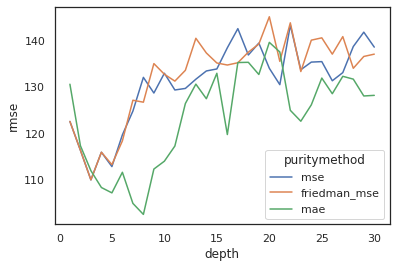

In [ ]:
ind = 1
crit = ['mse', 'friedman_mse', 'mae']
df_results = pd.DataFrame(columns = ['depth', 'puritymethod', 'rmse'])

for i in np.arange(1, 31):
  for j in crit:
    model = DecisionTreeRegressor(max_depth=i, criterion=j)
    model.fit(X_train, y_train)
    pred = model.predict (X_test)
    df_results.loc[ind] = [i, j, mean_squared_error(y_test, pred, squared = False)]
    ind+=1
sns_plot = sns.lineplot(x = 'depth', y = 'rmse', hue='puritymethod', data = df_results)
sns_plot.figure.savefig("decisiontree.png")
#print('Best performing model')      
#print(tabulate(df_results[df_results['rmse']==df_results['rmse'].min()], headers = 'keys', tablefmt = 'psql'))
print('All results')
print(tabulate(df_results, headers = 'keys', tablefmt = 'psql'))

In [ ]:
print('Best performing model')      
print(tabulate(df_results[df_results['rmse']==df_results['rmse'].min()], headers = 'keys', tablefmt = 'psql'))

Best performing model
+----+---------+----------------+--------+
|    |   depth | puritymethod   |   rmse |
|----+---------+----------------+--------|
| 24 |       8 | mae            | 102.53 |
+----+---------+----------------+--------+


In [ ]:
dt_model = DecisionTreeRegressor(max_depth=8, criterion='mae')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict (X_test)

In [ ]:
# Prediction
prediction_list['Decision Tree'] = np.array(y_pred_dt[:20])
prediction_list

,KNN,Decision Tree
Actual Values,,
231.0,126.836133,158.5
65.0,119.915590,89.0
45.0,86.760114,55.0
80.0,110.140818,150.0
175.0,228.778231,232.0
40.0,72.585735,60.0
149.0,121.383060,96.0
699.0,201.703115,249.0
42.0,40.000000,40.0


In [ ]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared = False)

print('MAE: ',mae_dt)
print('RMSE: ',rmse_dt)
#print('Training R^2 Value: ', dt_model.score(X_train, y_train))
#print('Validation R^2 Value: ', r2_score(y_test, y_pred_dt))

MAE:  50.97502714440825
RMSE:  107.12915480345846


In [ ]:
# Graph Dictionary

prediction_dictionaries['Decision Tree'] = y_pred_dt



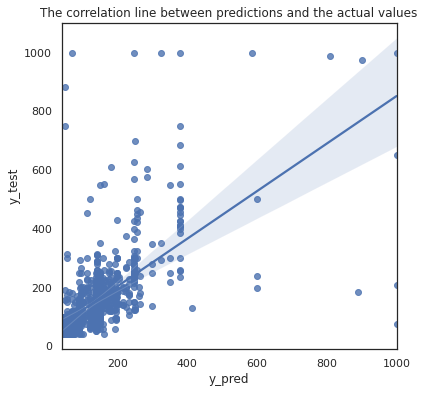

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x= y_pred_dt, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.savefig('knnline.png', dpi=300, bbox_inches='tight')
plt.show()

# Random Forest - Bagging

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_bagging = RandomForestRegressor (n_estimators=10).fit(X_train, y_train)
pred = model_bagging.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, pred))
print('RMSE: ',mean_squared_error(y_test, pred, squared = False))

MAE:  54.50714069129009
RMSE:  105.59521280468769


**Hyperparamter Random Forest**

Best performing model
+----+---------+----------------+---------+
|    |   depth | puritymethod   |    rmse |
|----+---------+----------------+---------|
| 30 |      15 | mae            | 96.0191 |
+----+---------+----------------+---------+
All results
+----+---------+----------------+----------+
|    |   depth | puritymethod   |     rmse |
|----+---------+----------------+----------|
|  1 |       1 | mse            | 119.988  |
|  2 |       1 | mae            | 130.702  |
|  3 |       2 | mse            | 111.692  |
|  4 |       2 | mae            | 116.251  |
|  5 |       3 | mse            | 109.538  |
|  6 |       3 | mae            | 111.862  |
|  7 |       4 | mse            | 109.74   |
|  8 |       4 | mae            | 106.779  |
|  9 |       5 | mse            | 106.179  |
| 10 |       5 | mae            | 105.565  |
| 11 |       6 | mse            | 106.899  |
| 12 |       6 | mae            | 103.818  |
| 13 |       7 | mse            | 100.538  |
| 14 |       7 | mae      

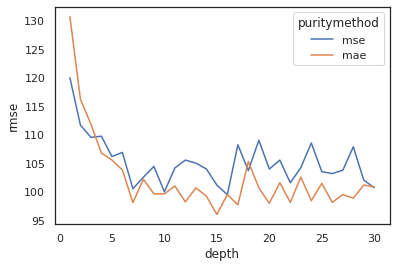

In [ ]:
ind = 1
crit = ['mse', 'mae']
df_results = pd.DataFrame(columns = ['depth', 'puritymethod', 'rmse'])

for i in np.arange(1, 31):
  for j in crit:
    model = RandomForestRegressor(n_estimators=10,max_depth=i, criterion=j)
    model.fit(X_train, y_train)
    pred = model.predict (X_test)
    df_results.loc[ind] = [i, j, mean_squared_error(y_test, pred, squared = False)]
    ind+=1
sns_plot = sns.lineplot(x = 'depth', y = 'rmse', hue='puritymethod', data = df_results)
sns_plot.figure.savefig("randomforest.png")
print('Best performing model')      
print(tabulate(df_results[df_results['rmse']==df_results['rmse'].min()], headers = 'keys', tablefmt = 'psql'))
print('All results')
print(tabulate(df_results, headers = 'keys', tablefmt = 'psql'))


In [ ]:
model_bagging = RandomForestRegressor (n_estimators=10,max_depth=15, criterion='mae').fit(X_train, y_train)
pred_rand_forest = model_bagging.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, pred_rand_forest))
print('RMSE: ',mean_squared_error(y_test, pred_rand_forest, squared = False))

MAE:  52.55792616720955
RMSE:  104.3921005353386


In [ ]:
prediction_dictionaries['Random Forest'] = pred_rand_forest

prediction_list['Random Forest'] = np.array(pred_rand_forest[:20])

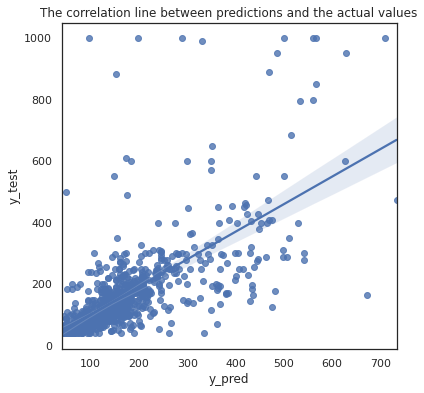

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x= pred_rand_forest, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.savefig('knnline.png', dpi=300, bbox_inches='tight')
plt.show()

# SVR

In [ ]:
from sklearn.svm import LinearSVR, SVR
clf_svr = LinearSVR()
clf_svr.fit(X_train, y_train)
preds_svr = clf_svr.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, preds_svr))
print('RMSE: ',mean_squared_error(y_test, preds_svr, squared = False))
#print("R2 Score: ",r2_score(y_test, preds_svr))


MAE:  56.19559897411181
RMSE:  118.4919879201715


In [ ]:
#prediction_dictionaries['SVR - Default'] = preds_svr
#plot_all_r2()

In [ ]:
# Prediction SVR (SVM)
#prediction_list['SVR-Default'] = np.array(preds_svr[:20])
#prediction_list

**HyperParameter Tuning - SVR**

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive','standard SVR'], 
              'dual': [True, False],
              'tol': [0.0001, 0.00001]} 

grid = GridSearchCV(LinearSVR(), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="neg_mean_squared_error") 

grid.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1753s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0472s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0564s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1511s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.5947s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.2s
[Parallel(n_

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'dual': [True, False],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive',
                                  'standard SVR'],
                         'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=10)

In [ ]:
print(f"Best parameters are {grid.best_params_}") 
print("Best score is {}".format(grid.best_score_ * -1))
print("Best model is {}".format(grid.best_estimator_))
print("scores {}".format(grid.cv_results_['mean_test_score']))

Best parameters are {'C': 1, 'dual': True, 'loss': 'squared_epsilon_insensitive', 'tol': 0.0001}
Best score is 11567.411750602094
Best model is LinearSVR(C=1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='squared_epsilon_insensitive',
          max_iter=1000, random_state=None, tol=0.0001, verbose=0)
scores [-16284.92600538 -16285.95761548 -11574.26998301 -11573.64509615
             nan             nan             nan             nan
 -11573.5506446  -11573.60678248             nan             nan
 -12662.99248829 -12658.78944146 -11567.4117506  -11594.8331956
             nan             nan             nan             nan
 -11576.85902564 -11576.91449281             nan             nan
 -12391.75103447 -12388.48078384 -12705.92017538 -12170.55246832
             nan             nan             nan             nan
 -11577.22961923 -11577.28497849             nan             nan
 -12332.75830928 -12368.82447939 -18569.52000291 -21618.55015665
     

In [ ]:
# Best Scores
print('Best score: ',grid.best_score_)

print('Best parameters: ',grid.best_params_)
print('Best estimator: ',grid.best_estimator_)

Best score:  -11567.411750602094
Best parameters:  {'C': 1, 'dual': True, 'loss': 'squared_epsilon_insensitive', 'tol': 0.0001}
Best estimator:  LinearSVR(C=1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='squared_epsilon_insensitive',
          max_iter=1000, random_state=None, tol=0.0001, verbose=0)


In [ ]:
# Parameter Tuned SVR

svr_best = LinearSVR(C=1, dual=True,
          loss='squared_epsilon_insensitive',
          tol=0.0001)

svr_best.fit(X_train, y_train)

preds_svr_best = svr_best.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#print('MAE: ', mean_absolute_error(y_test, preds_svr_best))
#print('RMSE: ',mean_squared_error(y_test, preds_svr_best, squared = False))

mae_svr = mean_absolute_error(y_test, preds_svr_best)
rmse_svr = mean_squared_error(y_test, preds_svr_best, squared = False)

print('MAE: ', mae_svr)
print('RMSE: ',rmse_svr)
#print('Training R^2 Value: ', knn_model.score(X_train, y_train))
#print('Validation R^2 Value: ', r2_score(y_test, preds_svr_best))

MAE:  60.43283826750579
RMSE:  111.75080051141414


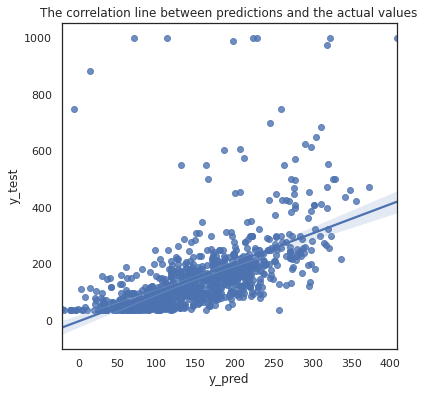

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x= preds_svr_best, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.savefig('knnline.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
prediction_dictionaries['SVR'] = preds_svr_best
#plot_all_r2()

In [ ]:
prediction_list['SVR'] = np.array(preds_svr_best[:20])
prediction_list

,KNN,Decision Tree,Random Forest,SVR
Actual Values,,,,
231.0,126.836133,158.5,242.10,186.343616
65.0,119.915590,89.0,88.90,107.909793
45.0,86.760114,55.0,71.10,123.482493
80.0,110.140818,150.0,249.30,174.827243
175.0,228.778231,232.0,213.10,200.305968
40.0,72.585735,60.0,67.40,70.343324
149.0,121.383060,96.0,147.85,110.830788
699.0,201.703115,249.0,248.20,245.212619
42.0,40.000000,40.0,40.00,-21.656097


# NN Regression

In [ ]:
model = MLPRegressor(max_iter=1000)
model.fit(X_train, y_train)
pred = model.predict (X_test)
print('MAE: ', mean_absolute_error(y_test, pred))
print('RMSE: ',mean_squared_error(y_test, pred, squared = False))

MAE:  58.272014925268174
RMSE:  103.05987425884084


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


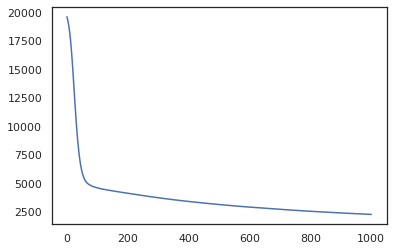

In [ ]:
sns.lineplot(y=model.loss_curve_, x= np.arange(1, len(model.loss_curve_)+1))

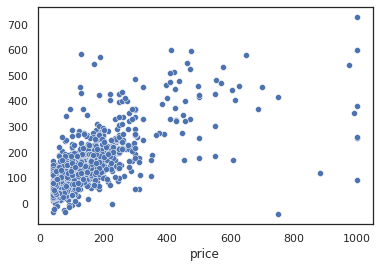

In [ ]:
sns.scatterplot(x= y_test, y = pred)

In [ ]:
df_results = pd.DataFrame(columns=['Learning Rate', 'Transfer Function',  'RMSE'])
lr = [0.00001, 0.0001, 0.01, 0.03, 1, 3, 10]
transfer_function = ['identity', 'logistic', 'tanh', 'relu']
k=0
for i in lr:
  for j in transfer_function:
    model = MLPRegressor(learning_rate_init= i, activation=j)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    df_results.loc[k] = [i, j, mean_squared_error(y_test, pred, squared = False)]
    k+=1
print('All results')
print(tabulate(df_results, headers = 'keys', tablefmt = 'psql'))
print('Best performing model')      
print(tabulate(df_results[df_results['RMSE']==df_results['RMSE'].min()], headers = 'keys', tablefmt = 'psql'))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


All results
+----+-----------------+---------------------+----------+
|    |   Learning Rate | Transfer Function   |     RMSE |
|----+-----------------+---------------------+----------|
|  0 |          1e-05  | identity            |  207.409 |
|  1 |          1e-05  | logistic            |  207.895 |
|  2 |          1e-05  | tanh                |  207.842 |
|  3 |          1e-05  | relu                |  208.294 |
|  4 |          0.0001 | identity            |  192.29  |
|  5 |          0.0001 | logistic            |  197.672 |
|  6 |          0.0001 | tanh                |  197.158 |
|  7 |          0.0001 | relu                |  183.029 |
|  8 |          0.01   | identity            |  111.437 |
|  9 |          0.01   | logistic            |  106.331 |
| 10 |          0.01   | tanh                |  111.189 |
| 11 |          0.01   | relu                |  108.759 |
| 12 |          0.03   | identity            |  112.253 |
| 13 |          0.03   | logistic            |  104.368 |
| 

In [ ]:
model = MLPRegressor(learning_rate_init= 0.03, activation='logistic')
model.fit(X_train, y_train)
preds_nn = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mae_nn = mean_absolute_error(y_test, preds_nn)
rmse_nn = mean_squared_error(y_test, preds_nn, squared = False)

print('MAE: ', mae_nn)
print('RMSE: ',rmse_nn)
#print('Training R^2 Value: ', knn_model.score(X_train, y_train))
#print('Validation R^2 Value: ', r2_score(y_test, preds_nn))

MAE:  58.58976704906927
RMSE:  104.38978272117234


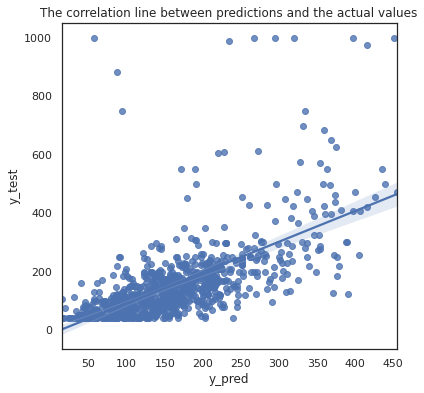

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x= preds_nn, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.savefig('knnline.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
prediction_dictionaries['Neural Network']  = preds_nn
#plot_all_r2()

In [ ]:
prediction_list['Neural Network'] = np.array(preds_nn[:20])
#prediction_list

#Linear Regression

In [ ]:

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred_lin = regr.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_lin)
rmse_linear = mean_squared_error(y_test, y_pred_lin, squared = False)

print('MAE: ', mae_linear)
print('RMSE: ',rmse_linear)
print('R^2 Value: ', regr.score(X_train, y_train))
#print('Validation R^2 Value: ', r2_score(y_test, y_pred_lin))
#print('R^2 Value: ', regr.score(X_train, y_train))
#print('Coefficients: ',regr.coef_)
#print('Intercept:', regr.intercept_)

MAE:  52.70539330461238
RMSE:  112.62482256842674
R^2 Value:  0.5071281011123612


In [ ]:
prediction_list['Linear'] = np.array(y_pred_lin[:20])

In [ ]:
prediction_dictionaries['Linear'] = y_pred_lin

In [ ]:
"""
from sklearn.metrics import *
pred = regr.predict(X_test)
print('MAE: ', mean_absolute_error(y_test,pred))
print('RMSE: ', mean_squared_error(y_test,pred, squared = False))

"""

In [ ]:
from sklearn.linear_model import Ridge

alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 250, 500, 750, 1000, 1500, 2500, 5000, 10000, 100000, 1000000]
param_grid = {
    'alpha': alpha
}

ridge = Ridge(alpha=1).fit(X_train, y_train)
scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
scores_mse = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("CV Mean for Ridge (r2): ", np.mean(scores))
print("CV Mean for Ridge (mse): ", np.mean(scores_mse) * -1)

CV Mean for Ridge (r2):  0.32723800052456686
CV Mean for Ridge (mse):  10902.038757192391


In [ ]:
grid_mse = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_result_mse = grid_mse.fit(X_train, y_train)

grid_r2 = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result_r2 = grid_r2.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.7s finished


In [ ]:
print('Best Score for mse: ', grid_mse.best_score_ * -1)
print('Best Params for mse: ', grid_mse.best_params_)
print()
print('Best Score for r2: ', grid_r2.best_score_)
print('Best Params for r2: ', grid_r2.best_params_)

Best Score for mse:  10861.876650318653
Best Params for mse:  {'alpha': 250}

Best Score for r2:  0.3306668110948327
Best Params for r2:  {'alpha': 250}


In [ ]:
ridge_best = Ridge(alpha=250).fit(X_train, y_train)
ridge_best.fit(X_train, y_train)
ridge_pred = ridge_best.predict(X_test)

"""
ridge_mse_best = metrics.mean_squared_error(y_test, ridge_pred)
ridge_mae_best = metrics.mean_absolute_error(y_test, ridge_pred)
ridge_rmse_best = np.sqrt(ridge_mse_best)
ridge_r2_best = metrics.r2_score(y_test, ridge_pred)

print("Mean Squared Error: {}".format(ridge_mse_best))
print("Mean Absolute Error: {}".format(ridge_mae_best))
print("Root Mean Absolute Error: {}".format(ridge_rmse_best))
print("R2 score: {}".format(ridge_r2_best))
"""

mae_ridge = mean_absolute_error(y_test, y_pred)
rmse_ridge = mean_squared_error(y_test, ridge_pred, squared = False)

print('MAE: ',mae_ridge)
print('RMSE: ',rmse_ridge)

MAE:  49.475600645732015
RMSE:  111.77677319569607


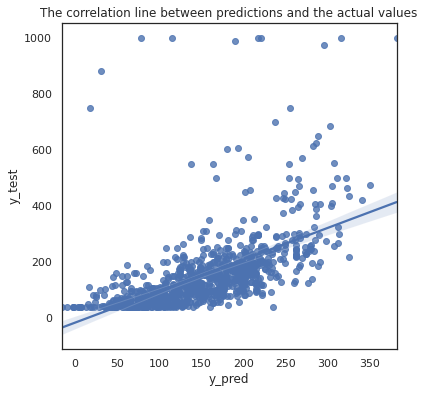

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x= ridge_pred, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.savefig('knnline.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
prediction_dictionaries['Ridge'] = ridge_pred

In [ ]:
#plot_all_r2()

In [ ]:
prediction_list['Ridge'] = np.array(ridge_pred[:20])
prediction_list

,KNN,Decision Tree,Random Forest,SVR,Neural Network,Ridge
Actual Values,,,,,,
231.0,126.836133,158.5,242.10,186.343616,150.953670,186.793520
65.0,119.915590,89.0,88.90,107.909793,81.046303,109.358288
45.0,86.760114,55.0,71.10,123.482493,92.488462,117.999483
80.0,110.140818,150.0,249.30,174.827243,224.732746,175.528567
175.0,228.778231,232.0,213.10,200.305968,214.103986,194.885434
40.0,72.585735,60.0,67.40,70.343324,87.831141,74.792064
149.0,121.383060,96.0,147.85,110.830788,118.163111,110.012232
699.0,201.703115,249.0,248.20,245.212619,331.758734,238.422700
42.0,40.000000,40.0,40.00,-21.656097,45.598887,-16.039965


# Random Forest Regressor

In [ ]:
"""
forest_model = RandomForestRegressor() #n_estimators is 100 by default
forest_model.fit(X_train, y_train)
forest_model_prediction = forest_model.predict(X_test)

forest_mae = mean_absolute_error(y_test,forest_model_prediction)
forest_rmse = mean_squared_error(y_test,forest_model_prediction, squared = False)

print('MAE: ', forest_mae)
print('RMSE: ', forest_rmse)
"""

MAE:  50.10380616583292
RMSE:  101.24098105200807


In [ ]:
#prediction_dictionaries['Random Forest - Default'] = forest_model_prediction
#plot_all_r2()

In [ ]:
#prediction_list['Random Forest - Default'] = np.array(forest_model_prediction[:20])
#prediction_list

# XG Boost

In [ ]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
#training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

"""
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))

print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))


print('\nMAE: ', mean_absolute_error(y_test, val_preds_xgb_reg))
print('RMSE: ',mean_squared_error(y_test, val_preds_xgb_reg, squared = False))
"""

mae_xg = mean_absolute_error(y_test, val_preds_xgb_reg)
rmse_xg = mean_squared_error(y_test, val_preds_xgb_reg, squared = False)

print('MAE: ',mae_xg)
print('RMSE: ',rmse_xg)
#print('Training R^2 Value: ', knn_model.score(X_train, y_train))
#print('Validation R^2 Value: ', r2_score(y_test, val_preds_xgb_reg))

[16:07:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE:  52.23995357434732
RMSE:  103.48883677176302


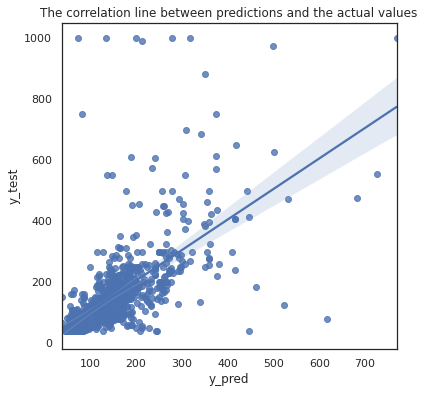

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x= val_preds_xgb_reg, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.savefig('knnline.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
prediction_dictionaries['XGB'] = val_preds_xgb_reg
prediction_list['XGB'] = np.array(val_preds_xgb_reg[:20])

In [ ]:
"""
ind = 1
crit = ['mse', 'friedman_mse', 'mae']
df_results = pd.DataFrame(columns = ['depth', 'puritymethod', 'rmse'])

for i in np.arange(1, 31):
  for j in crit:
    model = DecisionTreeRegressor(max_depth=i, criterion=j)
    model.fit(X_train, y_train)
    pred = model.predict (X_test)
    df_results.loc[ind] = [i, j, mean_squared_error(y_test, pred, squared = False)]
    ind+=1
sns.lineplot(x = 'depth', y = 'rmse', hue='puritymethod', data = df_results)

print('Best performing model')      
print(tabulate(df_results[df_results['rmse']==df_results['rmse'].min()], headers = 'keys', tablefmt = 'psql'))
print('All results')
print(tabulate(df_results, headers = 'keys', tablefmt = 'psql'))
"""

In [ ]:
ft_weights_xgb_reg

,weight
room_type_Entire home/apt,0.168091
accommodates,0.136955
bathrooms,0.097186
gym,0.064425
parking,0.050503
maximum_nights,0.049063
property_type_Other,0.043391
instant_bookable,0.037636
property_type_House,0.034412
latitude,0.031793


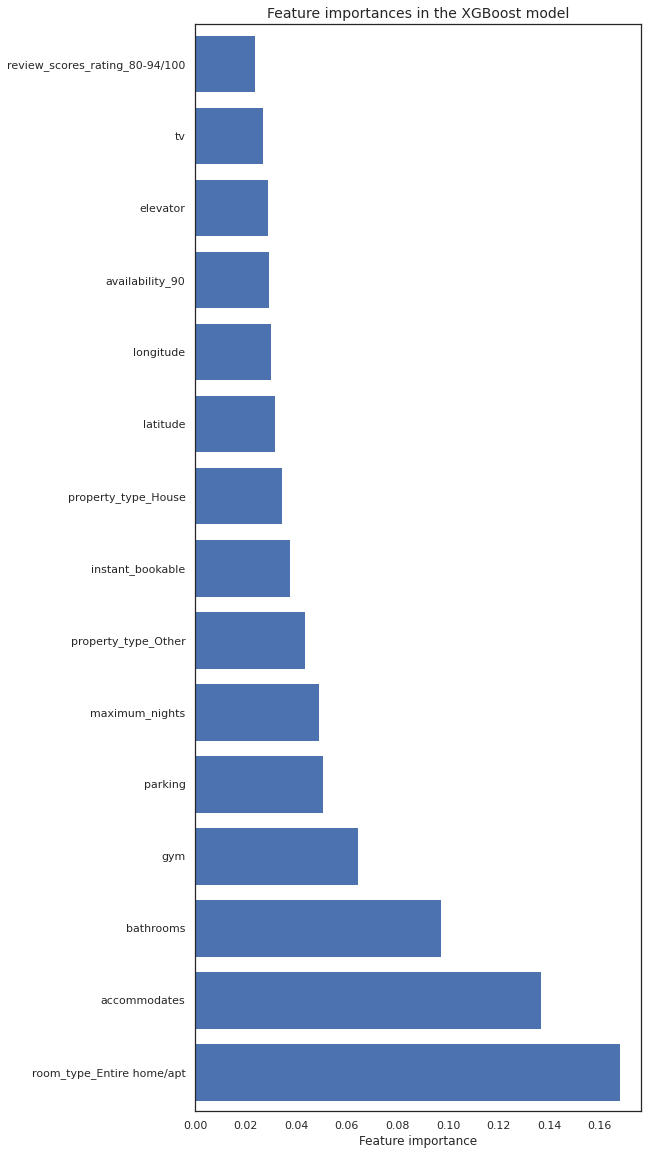

In [ ]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg = ft_weights_xgb_reg.sort_values('weight', ascending=False)
ft_weights_xgb_reg = ft_weights_xgb_reg.iloc[:15]

plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [ ]:
"""
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()
"""

HyperParamter Tuning - XGB

Parameters
Default parameters
max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:squarederror', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain'

Explanation of relevant parameters for this kernel.

booster: Select the type of model to run at each iteration
gbtree: tree-based models
gblinear: linear models
nthread: default to maximum number of threads available if not set
objective: This defines the loss function to be minimized
Parameters for controlling speed

subsample: Denotes the fraction of observations to be randomly samples for each tree
colsample_bytree: Subsample ratio of columns when constructing each tree.
n_estimators: Number of trees to fit.
Important parameters which control overfiting

learning_rate: Makes the model more robust by shrinking the weights on each step
max_depth: The maximum depth of a tree.
min_child_weight: Defines the minimum sum of weights of all observations required in a child.

In [ ]:
"""
# Generate a kNN model
knn_model = neighbors.KNeighborsRegressor()
print(knn_model.get_params())

# Give parameter values
parameters = {'n_neighbors':np.arange(1,21), 'metric': ['euclidean', 'manhattan'], 'weights': ['uniform', 'distance']}

# Grid search best model
optimized_model = GridSearchCV(knn_model, parameters, cv=5, scoring='neg_root_mean_squared_error' )
optimized_model.fit(transformed_df.drop('price', axis=1), transformed_df.price)

# Result
results = pd.DataFrame(optimized_model.cv_results_)
print(tabulate(results, headers = 'keys', tablefmt = 'psql'))

# Best Scores
print('Best score: ',optimized_model.best_score_)
print('Best parameters: ',optimized_model.best_params_)
print('Best estimator: ',optimized_model.best_estimator_)
"""

In [ ]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = xgb.XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           scoring='neg_root_mean_squared_error',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
#hyperParameterTuning(X_train, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 61.0min finished


' Commented becz takes lot of time '

**Result for XG boost parameter tuning :** 

Fitting 5 folds for each of 288 candidates, totalling 1440 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 47.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 59.7min finished

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [ ]:
xgb_reg = xgb.XGBRegressor(colsample_bytree= 0.5,
 learning_rate = 0.01,
 max_depth= 10,
 min_child_weight= 1,
 n_estimators= 500,
 objective= 'reg:squarederror',
 subsample= 0.5)

xgb_reg.fit(X_train, y_train)

training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)


"""
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))

print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))
"""

#print('\nMAE: ', mean_absolute_error(y_test, val_preds_xgb_reg))
#print('RMSE: ',mean_squared_error(y_test, val_preds_xgb_reg, squared = False))

mae_xgb = mean_absolute_error(y_test, val_preds_xgb_reg)
rmse_xgb = mean_squared_error(y_test, val_preds_xgb_reg, squared = False)

print('MAE: ', mae_xgb)
print('RMSE: ',rmse_xgb)
#print('Training R^2 Value: ', xgb_reg.score(X_train, y_train))
#print('Validation R^2 Value: ', r2_score(y_test, val_preds_xgb_reg))

MAE:  46.582665255999075
RMSE:  93.21524267797969


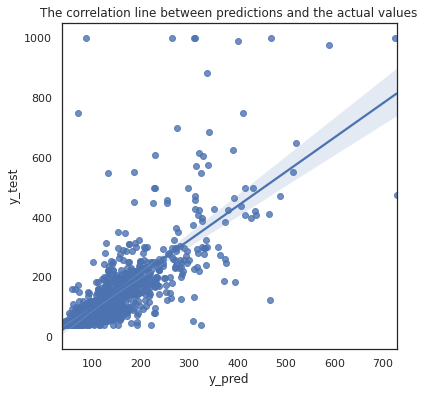

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(x= val_preds_xgb_reg, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.savefig('knnline.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
prediction_dictionaries['XGB'] = val_preds_xgb_reg
prediction_list['XGB'] = np.array(val_preds_xgb_reg[:20])

In [ ]:
ft_weights_xgb_reg.rename(index={"room_type_Entire home/apt": "Entire home/apt"})

,weight
Entire home/apt,0.203301
bathrooms,0.097357
accommodates,0.080909
gym,0.037732


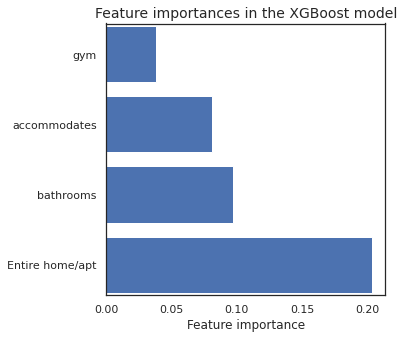

In [ ]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg = ft_weights_xgb_reg.sort_values('weight', ascending=False)
ft_weights_xgb_reg = ft_weights_xgb_reg.iloc[:4]

ft_weights_xgb_reg = ft_weights_xgb_reg.rename(index={"room_type_Entire home/apt": "Entire home/apt"})

plt.figure(figsize=(5,5))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.savefig('impfeatures2.png')
plt.show()


**All Models in one table**

In [ ]:
models = [('kNN', rmse_knn),
          ('Decision Tree', rmse_dt),
          ('SVR', rmse_svr),
          ('Neural Networks',rmse_nn),
          #('Linear Regression', rmse_linear), 
          ('Ridge', rmse_ridge),
          #('XG Boost', rmse_xg),
          ('XGB', rmse_xgb)]


df_all_models = pd.DataFrame(models, columns = ['Model', 'RMSE'])
df_all_models = df_all_models.set_index('Model')
df_all_models.sort_values(by=['RMSE'])


,RMSE
Model,
XGB,96.202111
Ridge,106.713393
Decision Tree,109.157948
Neural Networks,110.054139
kNN,112.624823
SVR,113.128689


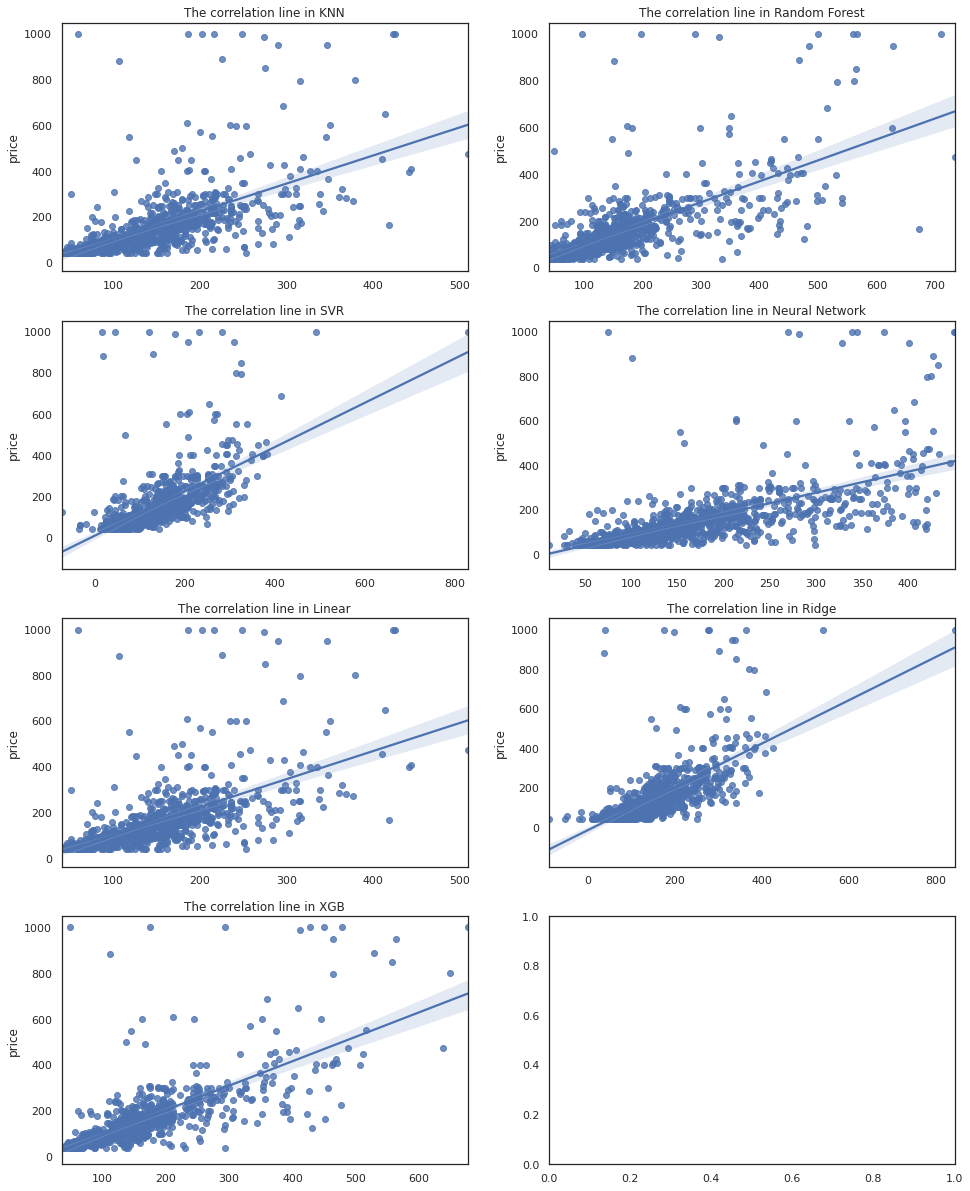

In [ ]:
plot_all_r2()

In [ ]:
prediction_list

,KNN,Decision Tree,Random Forest,SVR,Neural Network,Linear,Ridge,XGB
Actual Values,,,,,,,,
225.0,342.061760,425.0,400.60,308.563479,360.951072,342.061760,360.966128,477.180939
200.0,199.870305,121.0,171.30,136.989414,161.403711,199.870305,150.948554,147.171265
40.0,45.858948,70.0,41.00,63.082636,62.772179,45.858948,69.515021,44.691769
599.0,253.399505,183.0,298.90,190.405088,278.476915,253.399505,225.741410,244.636200
350.0,248.811737,425.0,511.50,280.904451,398.012787,248.811737,318.586473,369.807526
180.0,191.188667,161.0,191.30,177.656845,190.948836,191.188667,183.213653,185.405548
159.0,161.975684,121.0,141.50,176.665251,192.869431,161.975684,200.889802,132.237320
87.0,93.096328,85.0,141.10,153.532849,174.861901,93.096328,174.739117,112.689796
125.0,130.533630,121.0,132.30,123.777453,145.178044,130.533630,156.686047,138.189163
